# Analytics

#### Date: 2022/08

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2022/01
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [82]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [83]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [84]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [85]:
language = [['fga-eps-mds-2022-1-schedula-gerenciador_de_localidades', 'py'],
            ['fga-eps-mds-2022-1-schedula-gestor_de_usuarios', 'py'],
            ['fga-eps-mds-2022-1-schedula-detalhador_de_chamados', 'py'],
            ['fga-eps-mds-2022-1-schedula-front', 'ts'],
        ]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

### SonarCloud

##### Path to the folder with all your jsons

In [86]:
jsons = glob('./analytics-raw-data/*.json') # add your path here

In [87]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()
    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)
        
        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2022-1-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)
    print(aux_df)
    df['repository'] = aux_df[2]

    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [88]:
base_component_df = create_base_component_df(jsons)

    0         1                           2   3                 4      5 6
0      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
1      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
2      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
3      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
4      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
5      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
6      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
7      schedula      detalhador_de_chamados  14  08-2022-08-57-08  1.0.0  
8      schedula      detalhador_de_chamados   8  28-2022-19-44-43  1.0.0  
9      schedula      detalhador_de_chamados   8  28-2022-19-44-43  1.0.0  
10     schedula      detalhador_de_chamados   8  28-2022-19-44-43  1.0.0  
11     schedula      detalhador_de_chamados   8  28-2022-19-44-43  1.0.0  
12     schedula      deta

C:\Users\samue\AppData\Local\Temp\ipykernel_59512\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\2467025847.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component

In [89]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
0,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
1,functions,34,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
2,security_rating,1.0,True,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
3,files,21,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
4,complexity,44,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
5,ncloc,969,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
6,coverage,87.6,False,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
7,comment_lines_density,6.5,False,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
8,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0
9,functions,35,NaN,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,detalhador_de_chamados,1.0.0


#### Create dataframe per file

In [90]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [91]:
import re


def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_name = os.path.basename(i)

        file_repository = re.split(r'-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json', file_name)[0]

        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = file_language)

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json", expand=True)

    df['repository'] = aux_df[0]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [92]:
file_component_df = create_file_df(jsons)
file_component_df.repository.unique()

C:\Users\samue\AppData\Local\Temp\ipykernel_59512\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_59512\3123468760.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component

array(['fga-eps-mds-2022-1-schedula-detalhador_de_chamados',
       'fga-eps-mds-2022-1-schedula-front',
       'fga-eps-mds-2022-1-schedula-gerenciador_de_localidades',
       'fga-eps-mds-2022-1-schedula-gestor_de_usuarios'], dtype=object)

#### Removing NaN

In [93]:
file_component_df = file_component_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

#### Create dataframe per repository

In [94]:
# Example

detalhador_chamados_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-detalhador_de_chamados']
front_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-front']
gestor_usuarios_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-gestor_de_usuarios']
gerenciador_localidades_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-schedula-gerenciador_de_localidades']


In [95]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [96]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [97]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [98]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [99]:
def m4(df):

    passed_tests = (float(df['tests']) - (float(df['test_errors']) + float(df['test_failures']))) / float(df['tests'])

    return passed_tests

##### Fast test builds

In [100]:
def m5(df):

    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

##### Test coverage

In [101]:
def m6(df):

    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [102]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m3(version_df))
        m5_list.append(m3(version_df))
        m6_list.append(m3(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m3_list,
                               'm5': m3_list,
                               'm6': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [103]:
detalhador_chamados_metrics = create_metrics_df(detalhador_chamados_df)
front_metrics = create_metrics_df(front_df)
gestor_usuarios_metrics = create_metrics_df(gestor_usuarios_df)
gerenciador_localidades_metrics = create_metrics_df(gerenciador_localidades_df)

## Visualização dos Dados de [Maintainability e Reliability] De cada repositório
### Sobre cada métrica
**m1**: A m1, ou métrica 1, diz respeito a a complexidade do código que diz respeito a quantidade de caminhos independentes ou ciclos encontrados em um código.

**m2**: A m2, ou métrica dois, é a densidade de arquivos comentados, essa métrica conta o número de linhas comentadas no código.

**m3**: A métrica 3, ou m3, é duplicated_lines_density e diz respeito a quantidade de linhas de código duplicadas.

**m4**: A métrica 4, ou m4, é test_success_density, ou seja é a densidade de testes unitário executados com sucesso.

**m5**: A m5, ou métrica 5, diz respeito ao tempo de execução de testes unitátrios.

**m6**: A métrica 6 diz respeito ao coverage a também tem sua maior ocorrência em 1, entretanto essa métrica apenas observada dessa forma não se aproxima muito bem da realidade tendo em vista que ela olha todos os arquivos com extensão `ts` ou `py`, e não necessáriamente todos esses arquivos precisam ser testados ou são código de funcionalidade.

**Manutenibilidade**: Métrica de qualidade médida pelo sonarQube com base nas outras métricas coletadas e que estão disponíveis nos jsons, ela leva em conta os code_smells e outros.

**Confiabilidade**: É a capacidade do produto de software de manter um nível de desempenho especificado, quando usado em condições especificadas.

**total**: A métrica total indica a qualidade total de todo o projeto levando em conta as métricas citadas.

### Análise de estatística descritiva
* Realiza o cálculo de dados estatísticos de medidas de tendência central, como média, mediana, moda e percentis. Já as medidas de dispersão são o mínimo, máximo, desvio padrão e variância.Esta fase é a fase inicial da nossa análise de dados para descrever e resumir os nossos dados análisados.

#### Interpretando os dados:

* Média: Média dos valores do conjunto de dados
* Mediana: A mediana é o valor da váriavel que ocupa posição central do conjunto de dados ordenado. Na tabela de análise descritiva o valor 50% é o valor da mediana, e os valores de 75% e 25% são os percentis superiores e inferiores respectivamente, para uma melhor visualização ao fim da tabela foi adicionado um campo chamado mediana, porém o mesmo é igual ao valor de 50% já apresentado.
* Moda: Valor mais recorrente do conjunto de dados.
* Máximo: Maior valor do conjunto de dados
* Desvio padrão (std): Indica a dispersão do conjunto de dados, quanto mais próximo esse valor estiver de 0 mais homogêneo é o conjunto.
* Variância: Menor valor do conjunto de dados.
* Percentis: Os percentis incluidos na saída estão entre 0 e 1 e retornam o percentis de 25%, 50% e 75%

### Detalhador de chamados

In [104]:
detalhador_chamados_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.936508,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,2171
1,0.953353,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.1.0,16635
2,0.947368,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.2.0,7569


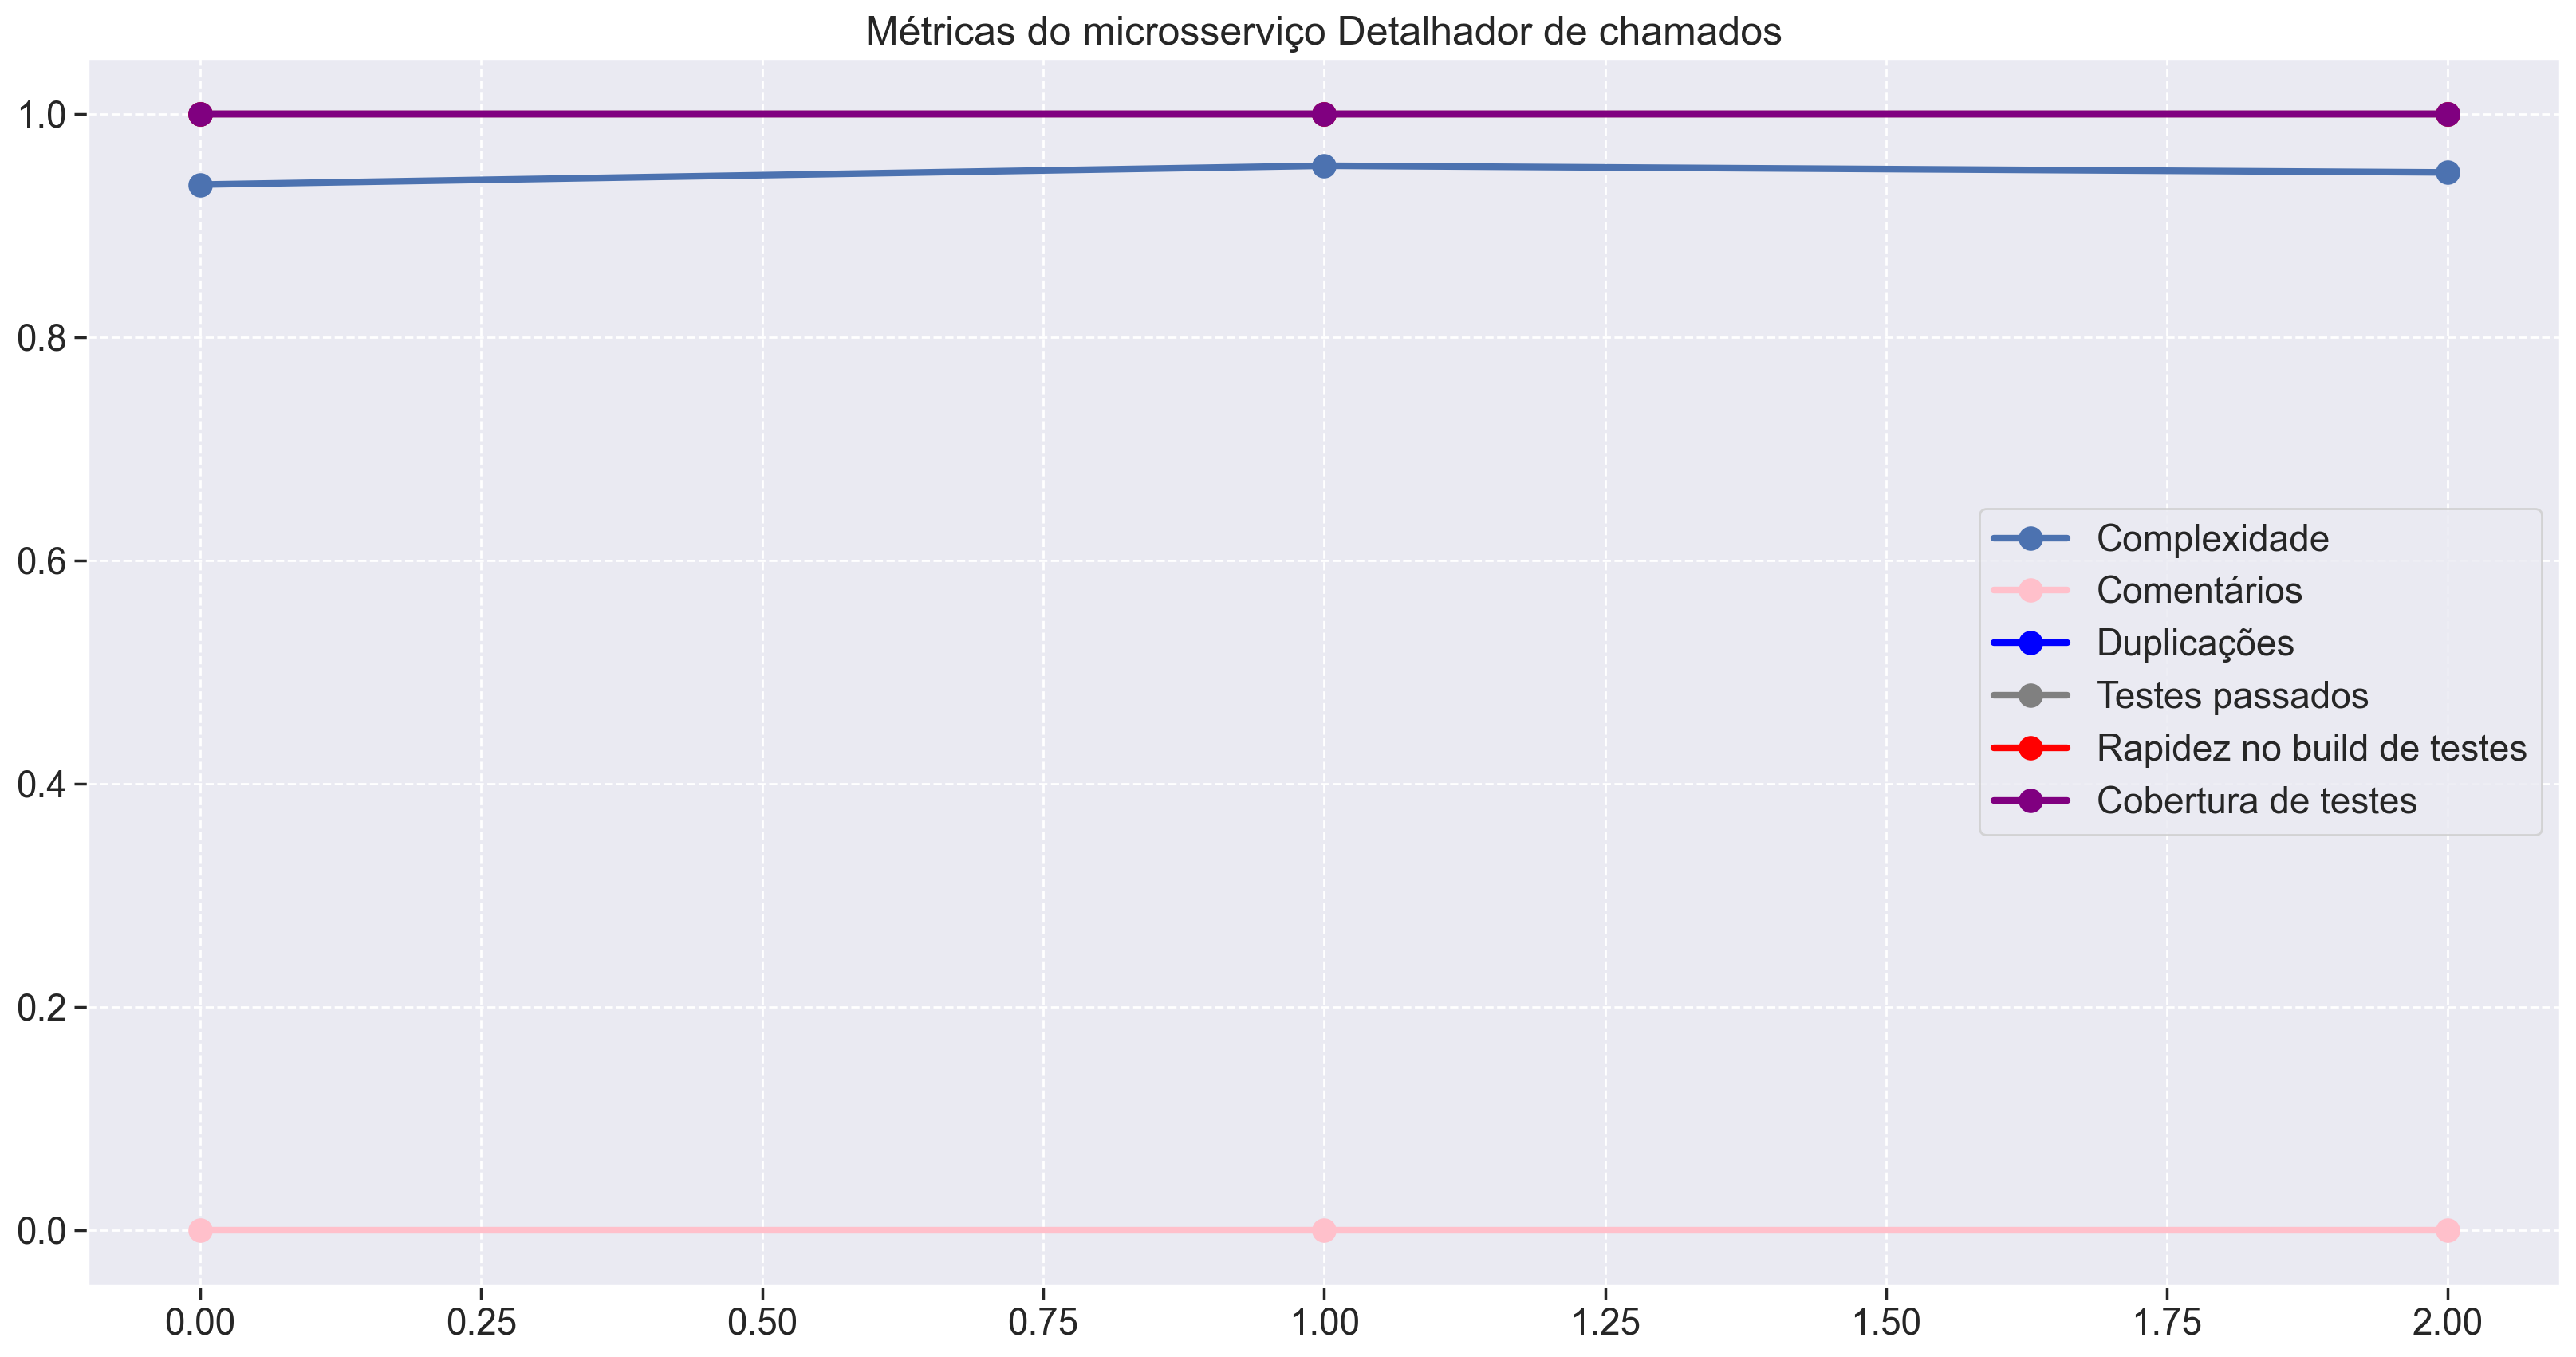

In [105]:
fig = plt.figure(figsize=(20, 10))

plt.title(label="Métricas do microsserviço Detalhador de chamados")
plt.plot(detalhador_chamados_metrics['m1'], linewidth=3, marker='o', markersize=10, label="Complexidade")
plt.plot(detalhador_chamados_metrics['m2'], linewidth=3, marker='o', markersize=10, label="Comentários", color="pink")
plt.plot(detalhador_chamados_metrics['m3'], linewidth=3, marker='o', markersize=10, label="Duplicações", color="blue")
plt.plot(detalhador_chamados_metrics['m4'], linewidth=3, marker='o', markersize=10, label="Testes passados", color='grey')
plt.plot(detalhador_chamados_metrics['m5'], linewidth=3, marker='o', markersize=10, label="Rapidez no build de testes", color="red")
plt.plot(detalhador_chamados_metrics['m6'], linewidth=3, marker='o', markersize=10, label="Cobertura de testes", color="purple")
plt.legend(loc='best')


{'whiskers': [<matplotlib.lines.Line2D at 0x27b8944af80>,
 'caps': [<matplotlib.lines.Line2D at 0x27b8944b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b8944acb0>,
 'medians': [<matplotlib.lines.Line2D at 0x27b8944bac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b8944bd90>,
 'means': []}

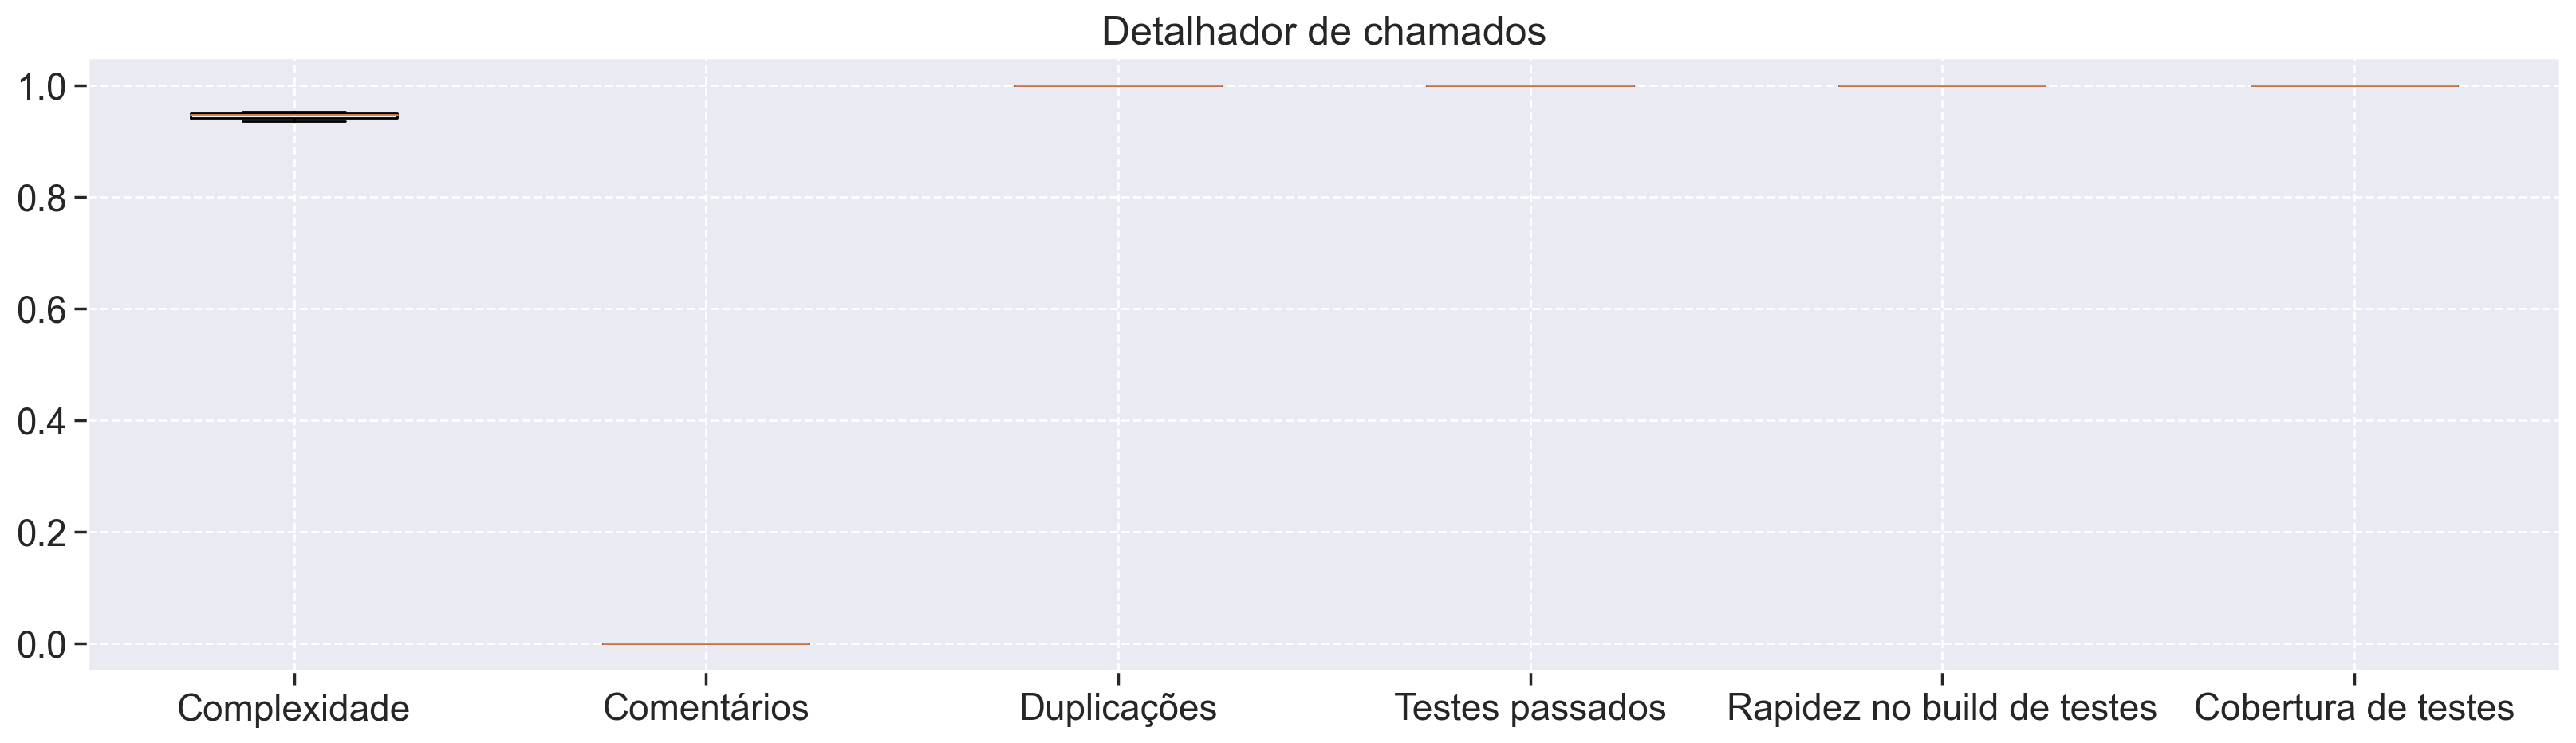

In [106]:
plt.figure(figsize=(20, 5))

# boxplot
plt.title(label="Detalhador de chamados")
plt.boxplot([detalhador_chamados_metrics['m1'], 
detalhador_chamados_metrics['m2'], 
detalhador_chamados_metrics['m3'], 
detalhador_chamados_metrics['m4'], 
detalhador_chamados_metrics['m5'], 
detalhador_chamados_metrics['m6']],
labels=["Complexidade",
"Comentários",
"Duplicações",
"Testes passados",
"Rapidez no build de testes",
"Cobertura de testes",])


### Front-end
Análise de dados relacionado ao front-end do schedula

In [107]:
front_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.940000,0.040000,0.800000,0.800000,0.800000,0.800000,fga-eps-mds-2022-1-schedula-front,1.0.0,3301
1,0.947368,0.000000,0.894737,0.894737,0.894737,0.894737,fga-eps-mds-2022-1-schedula-front,1.1.1,1070
2,0.966667,0.033333,0.933333,0.933333,0.933333,0.933333,fga-eps-mds-2022-1-schedula-front,1.1.2,1753
3,0.968750,0.031250,0.937500,0.937500,0.937500,0.937500,fga-eps-mds-2022-1-schedula-front,1.2.0,2289


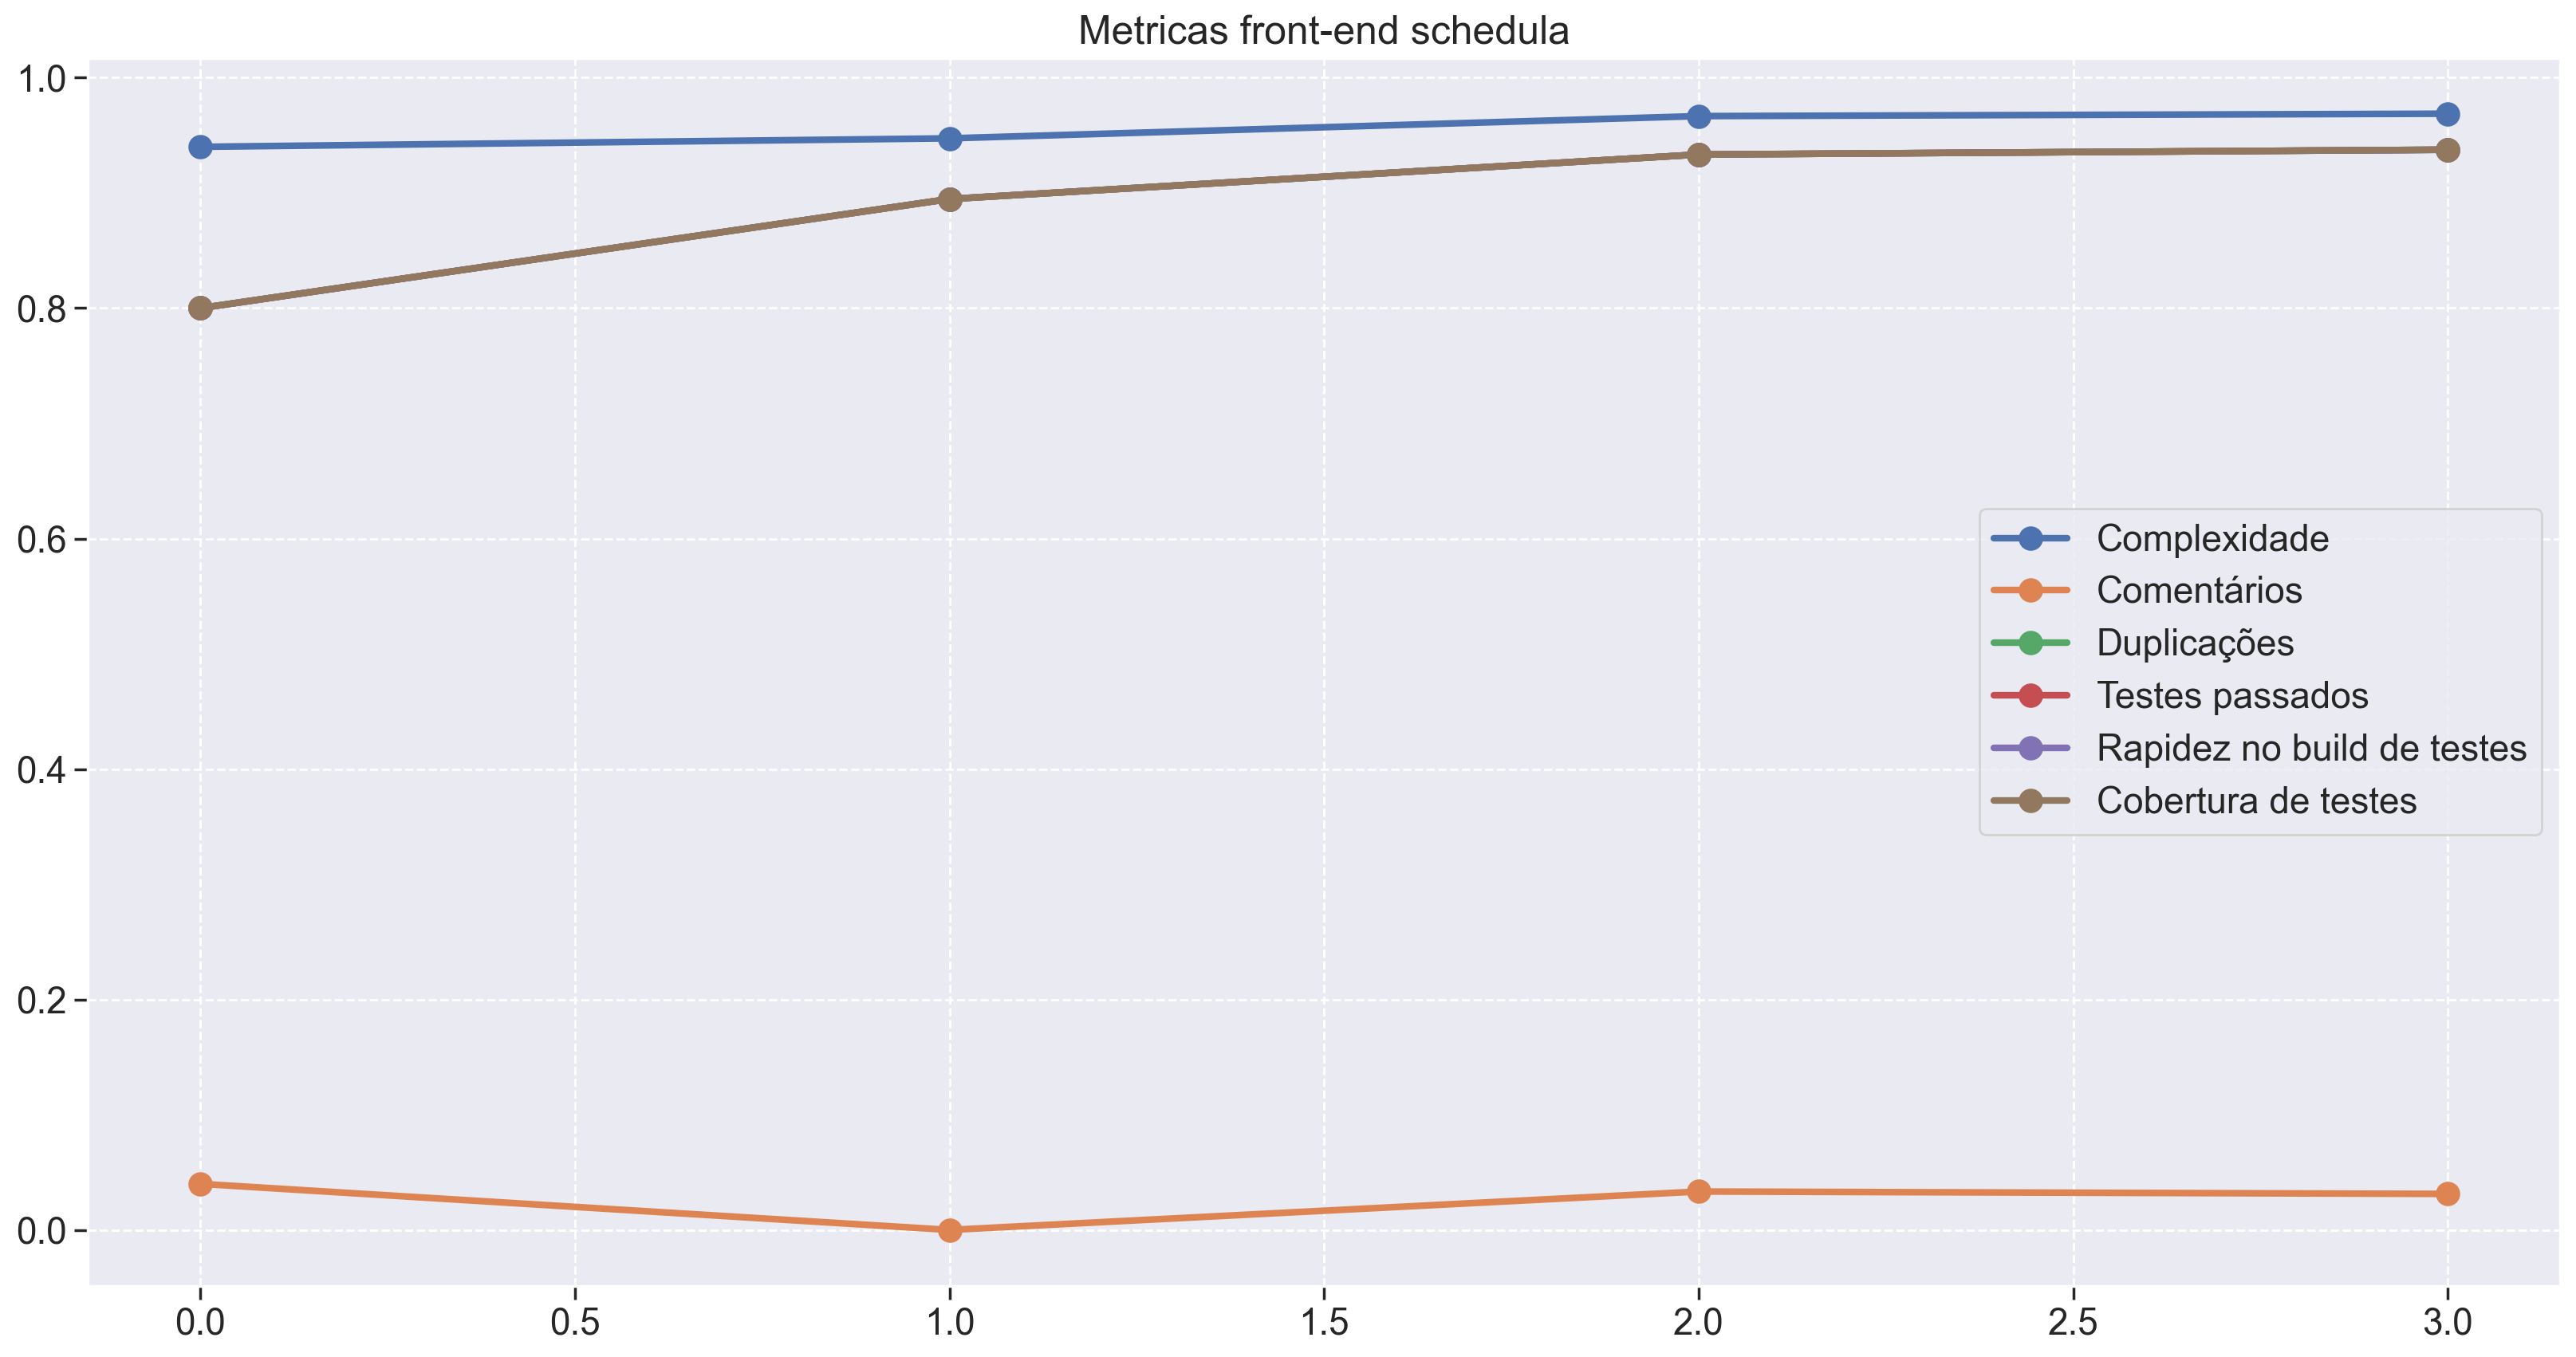

In [108]:
fig = plt.figure(figsize=(20, 10))

plt.title(label="Metricas front-end schedula")
plt.plot(front_metrics['m1'], linewidth=3, marker='o', markersize=10, label="Complexidade")
plt.plot(front_metrics['m2'], linewidth=3, marker='o', markersize=10, label="Comentários")
plt.plot(front_metrics['m3'], linewidth=3, marker='o', markersize=10, label="Duplicações")
plt.plot(front_metrics['m4'], linewidth=3, marker='o', markersize=10, label="Testes passados")
plt.plot(front_metrics['m5'], linewidth=3, marker='o', markersize=10, label="Rapidez no build de testes")
plt.plot(front_metrics['m6'], linewidth=3, marker='o', markersize=10, label="Cobertura de testes")
plt.legend(loc="best")


{'whiskers': [<matplotlib.lines.Line2D at 0x27b8b7289a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27b8b728f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b8b7286d0>,
 'medians': [<matplotlib.lines.Line2D at 0x27b8b7294e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b8b7297b0>,
 'means': []}

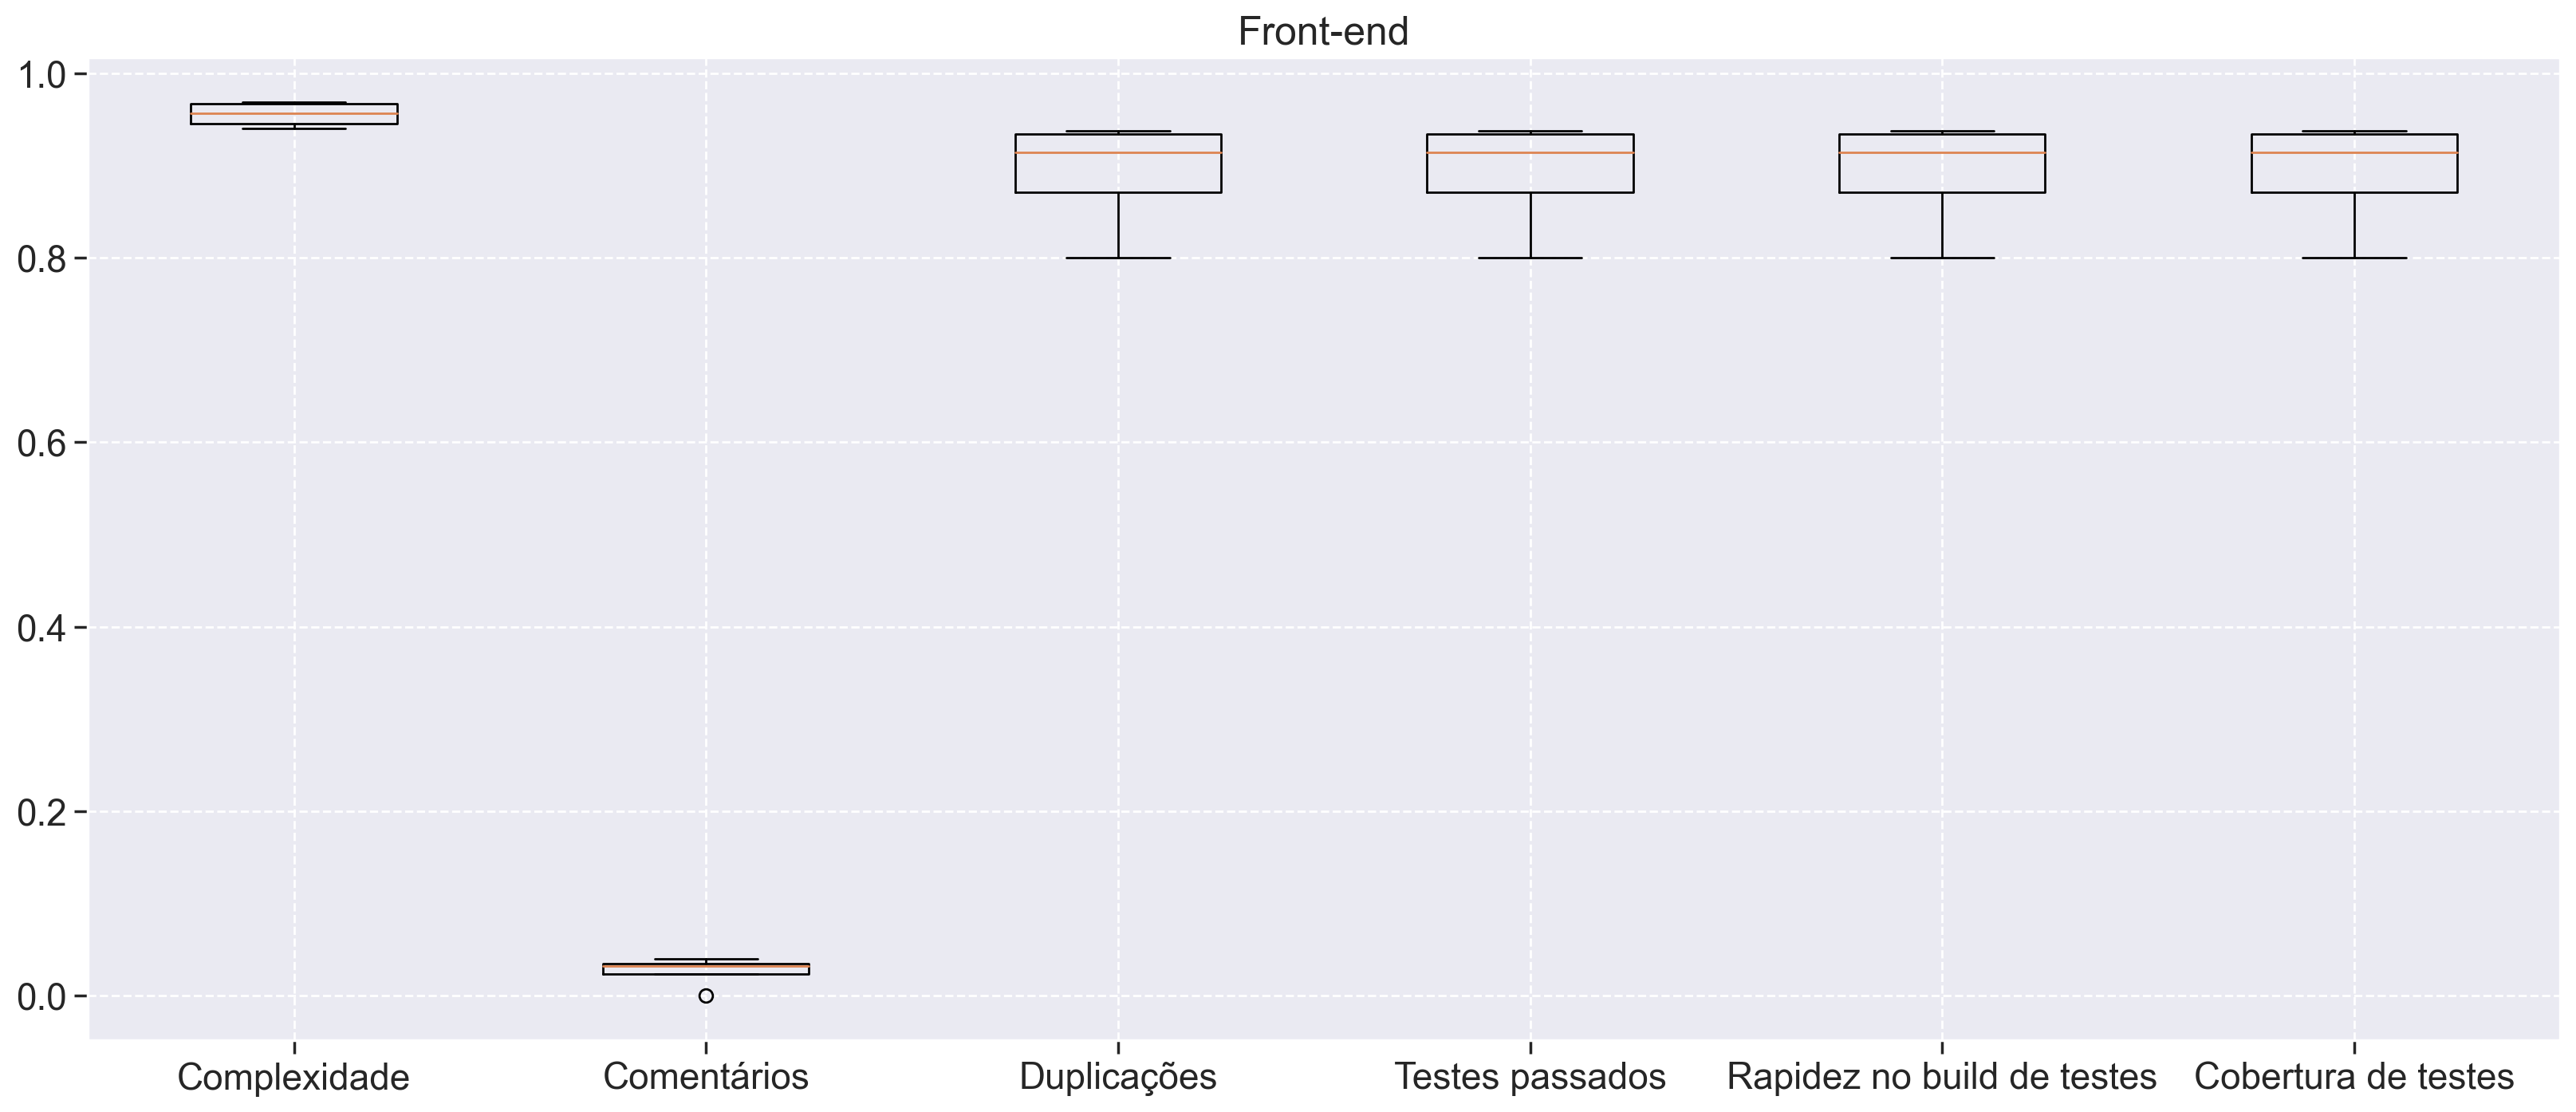

In [109]:
plt.figure(figsize=(20, 8))

# boxplot
plt.title(label="Front-end")
plt.boxplot([front_metrics['m1'], front_metrics['m2'], front_metrics['m3'], front_metrics['m4'], front_metrics['m5'], front_metrics['m6']],
labels=["Complexidade",
"Comentários",
"Duplicações",
"Testes passados",
"Rapidez no build de testes",
"Cobertura de testes",])


### Gestor de usuários

Análise de dados relacionado ao microsserviço Gestor de usuários do schedula

In [110]:
gestor_usuarios_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.843373,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.0,3769
1,0.857143,0.0,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.1,2416


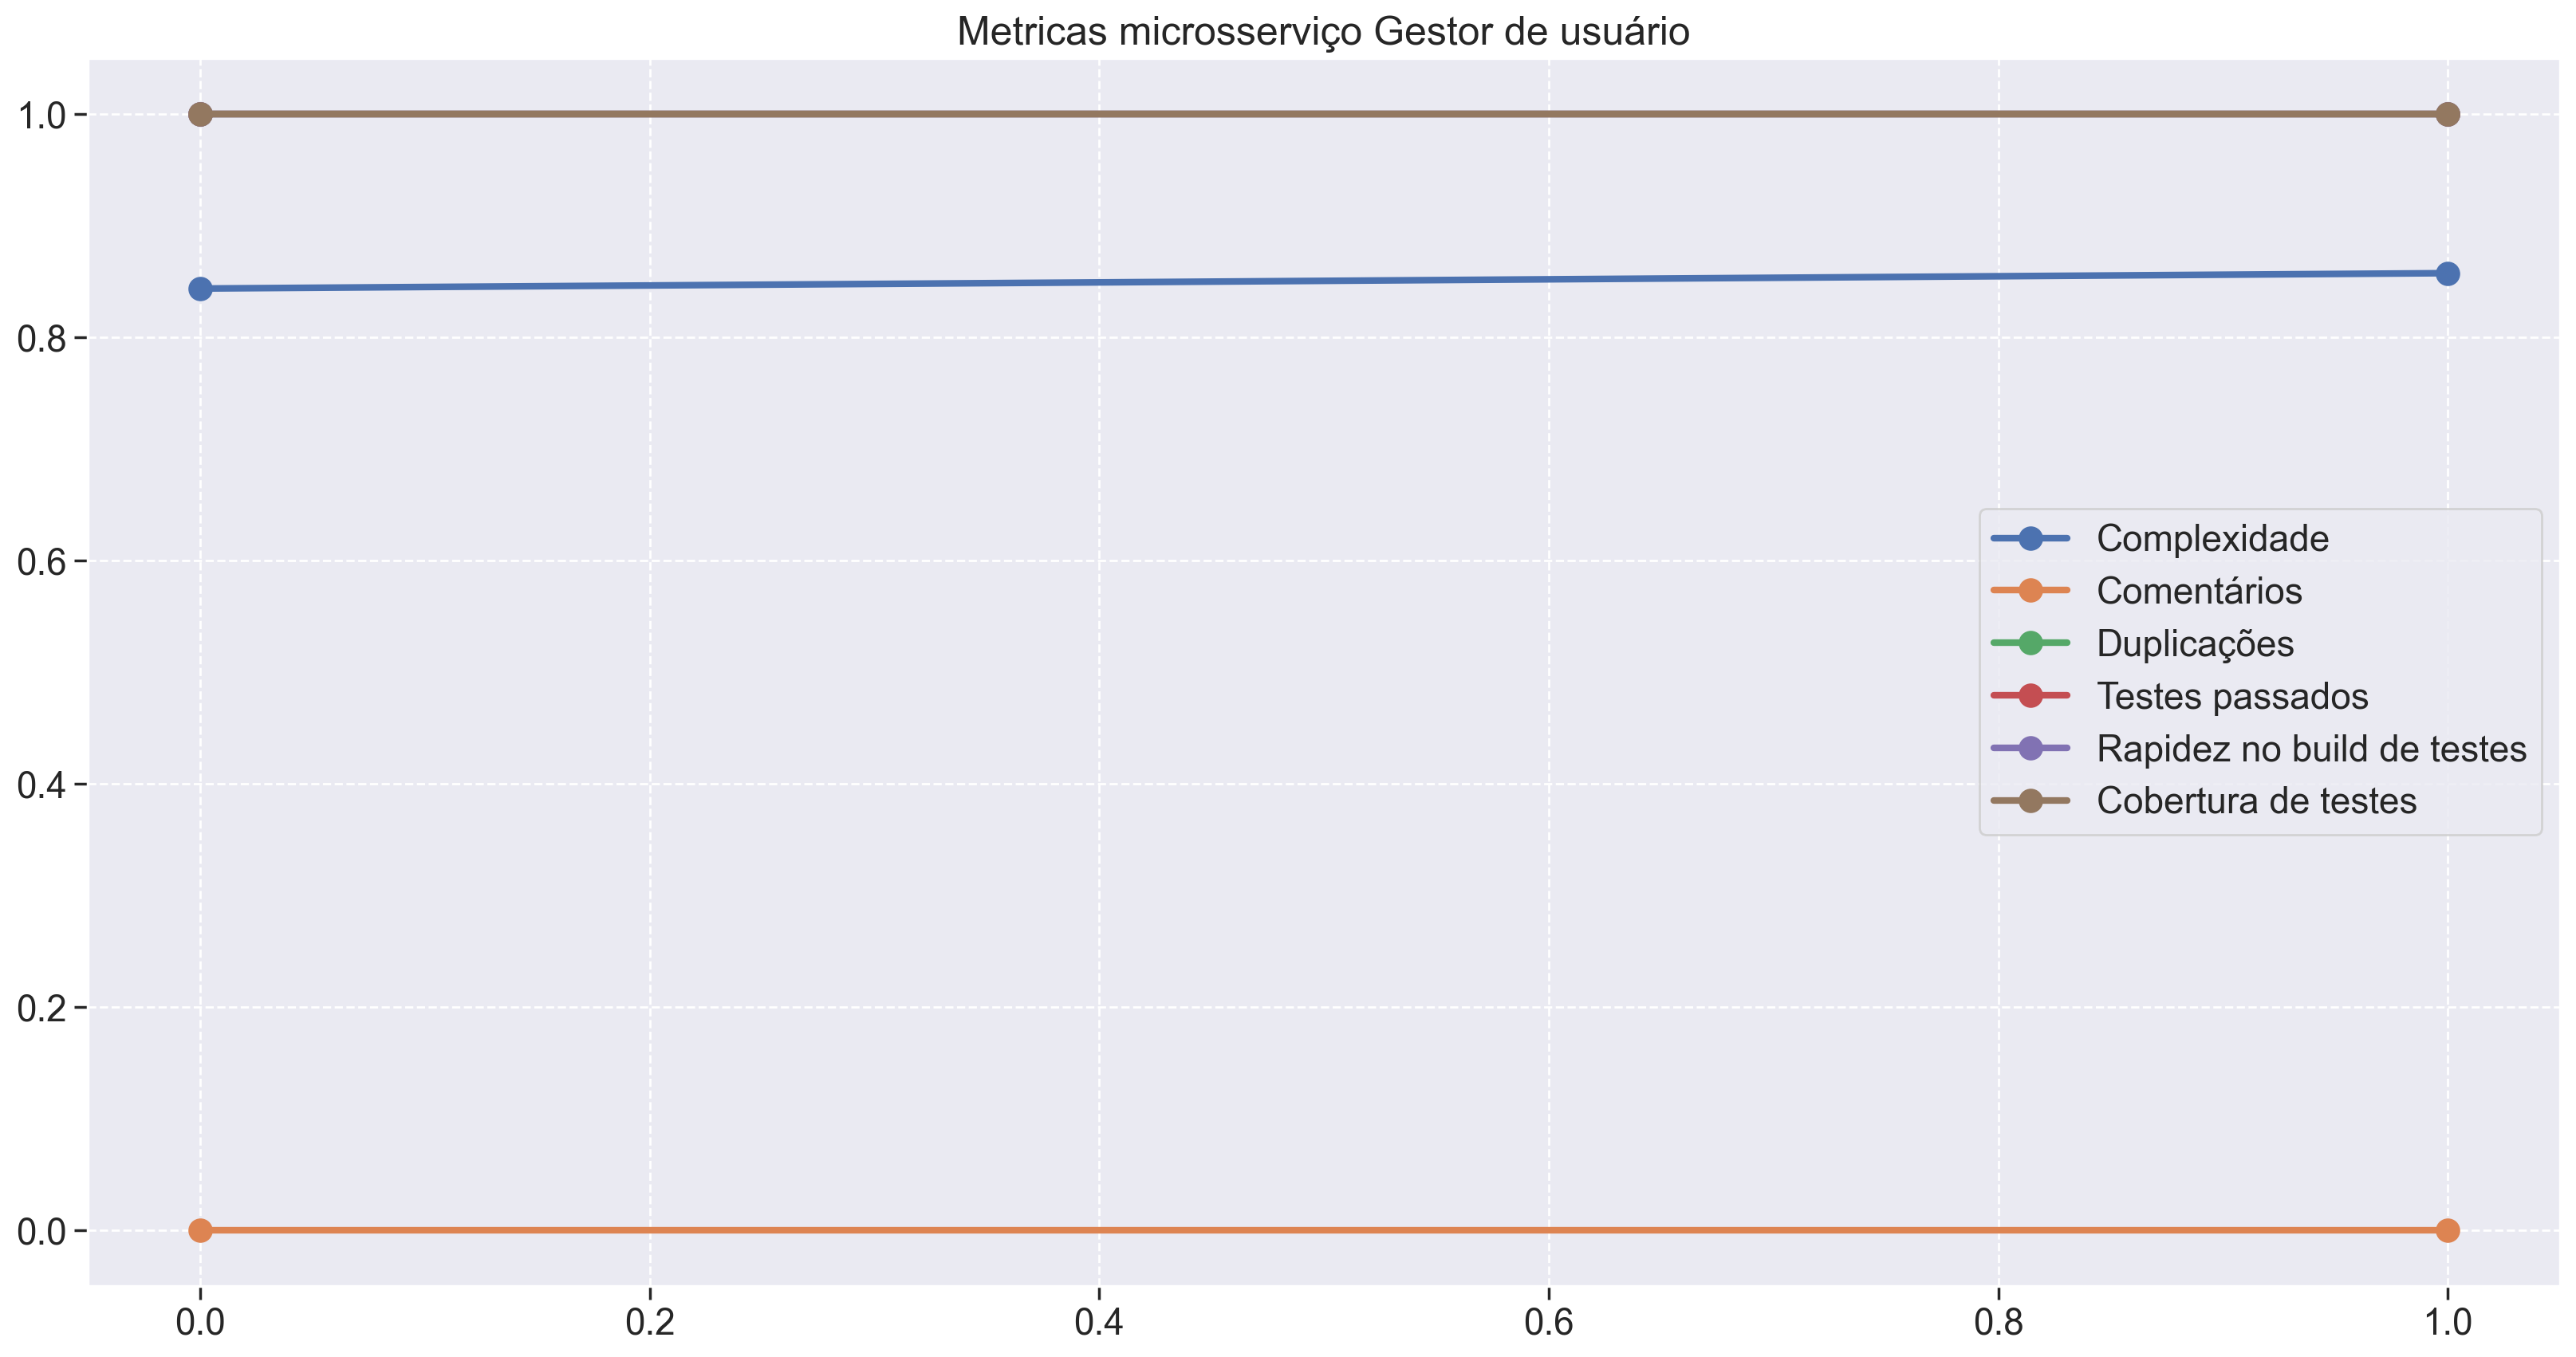

In [111]:
fig = plt.figure(figsize=(20, 10))

plt.title(label="Metricas microsserviço Gestor de usuário")
plt.plot(gestor_usuarios_metrics['m1'], linewidth=3, marker='o', markersize=10, label="Complexidade")
plt.plot(gestor_usuarios_metrics['m2'], linewidth=3, marker='o', markersize=10, label="Comentários")
plt.plot(gestor_usuarios_metrics['m3'], linewidth=3, marker='o', markersize=10, label="Duplicações")
plt.plot(gestor_usuarios_metrics['m4'], linewidth=3, marker='o', markersize=10, label="Testes passados")
plt.plot(gestor_usuarios_metrics['m5'], linewidth=3, marker='o', markersize=10, label="Rapidez no build de testes")
plt.plot(gestor_usuarios_metrics['m6'], linewidth=3, marker='o', markersize=10, label="Cobertura de testes")
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x27b8b876b30>,
 'caps': [<matplotlib.lines.Line2D at 0x27b8b8770d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b8b876860>,
 'medians': [<matplotlib.lines.Line2D at 0x27b8b877670>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b8b877940>,
 'means': []}

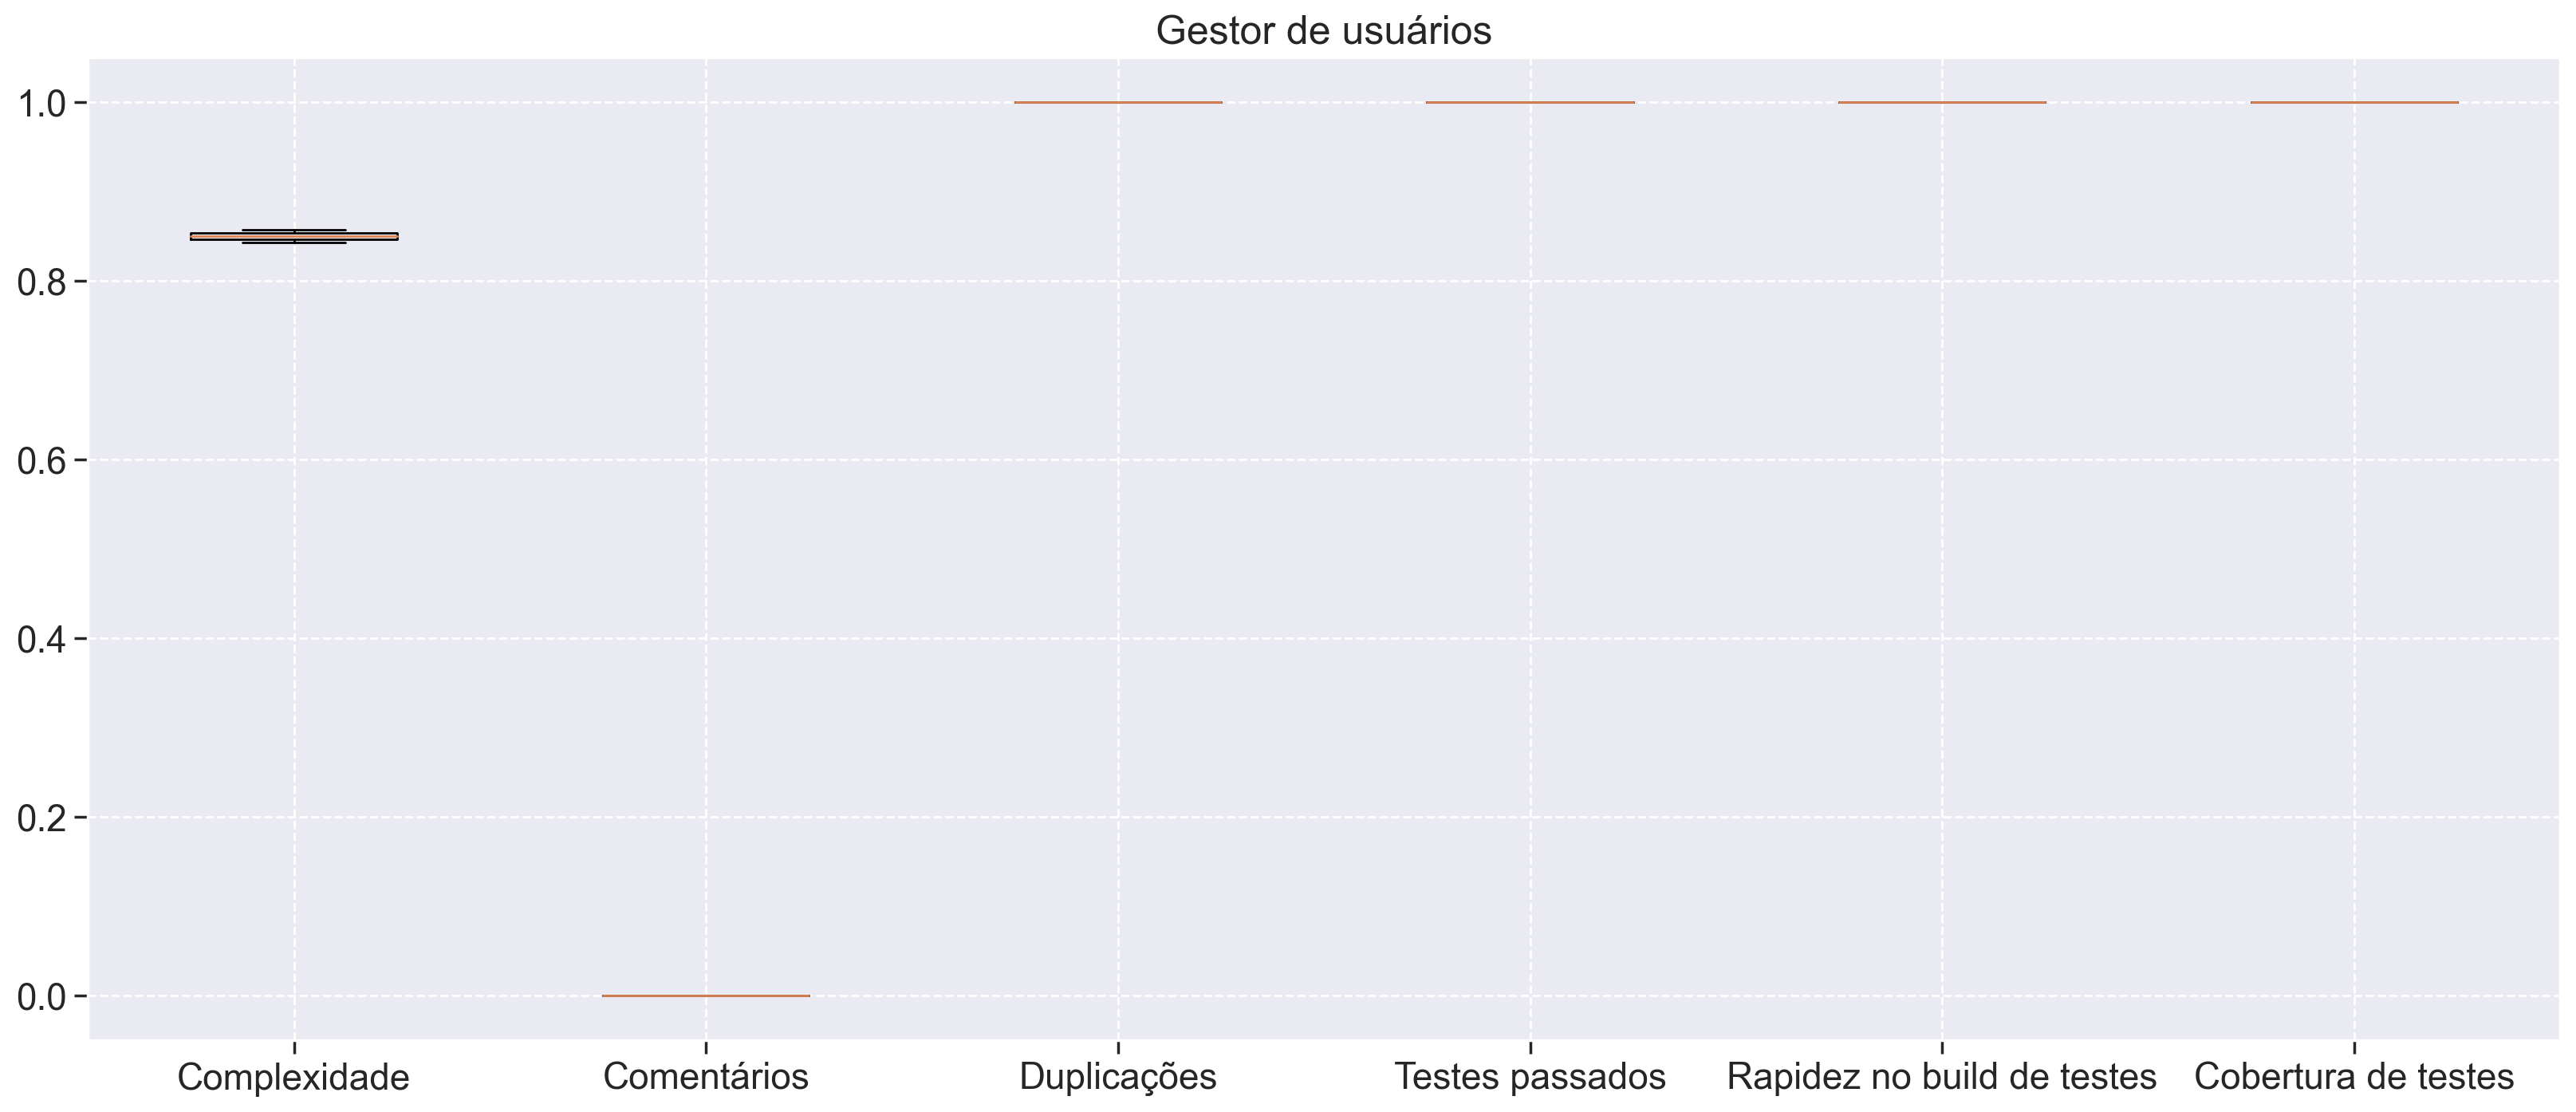

In [112]:
plt.figure(figsize=(20, 8))

# boxplot
plt.title(label="Gestor de usuários")
plt.boxplot([gestor_usuarios_metrics['m1'],
gestor_usuarios_metrics['m2'], 
gestor_usuarios_metrics['m3'], 
gestor_usuarios_metrics['m4'], 
gestor_usuarios_metrics['m5'], 
gestor_usuarios_metrics['m6']],
labels=["Complexidade",
"Comentários",
"Duplicações",
"Testes passados",
"Rapidez no build de testes",
"Cobertura de testes",])


### Gerenciador de localidades

In [113]:
gerenciador_localidades_metrics

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.935897,0.128205,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-gerenciador_de_loc...,1.0.0,3525
1,0.933333,0.133333,1.0,1.0,1.0,1.0,fga-eps-mds-2022-1-schedula-gerenciador_de_loc...,1.1.0,11205


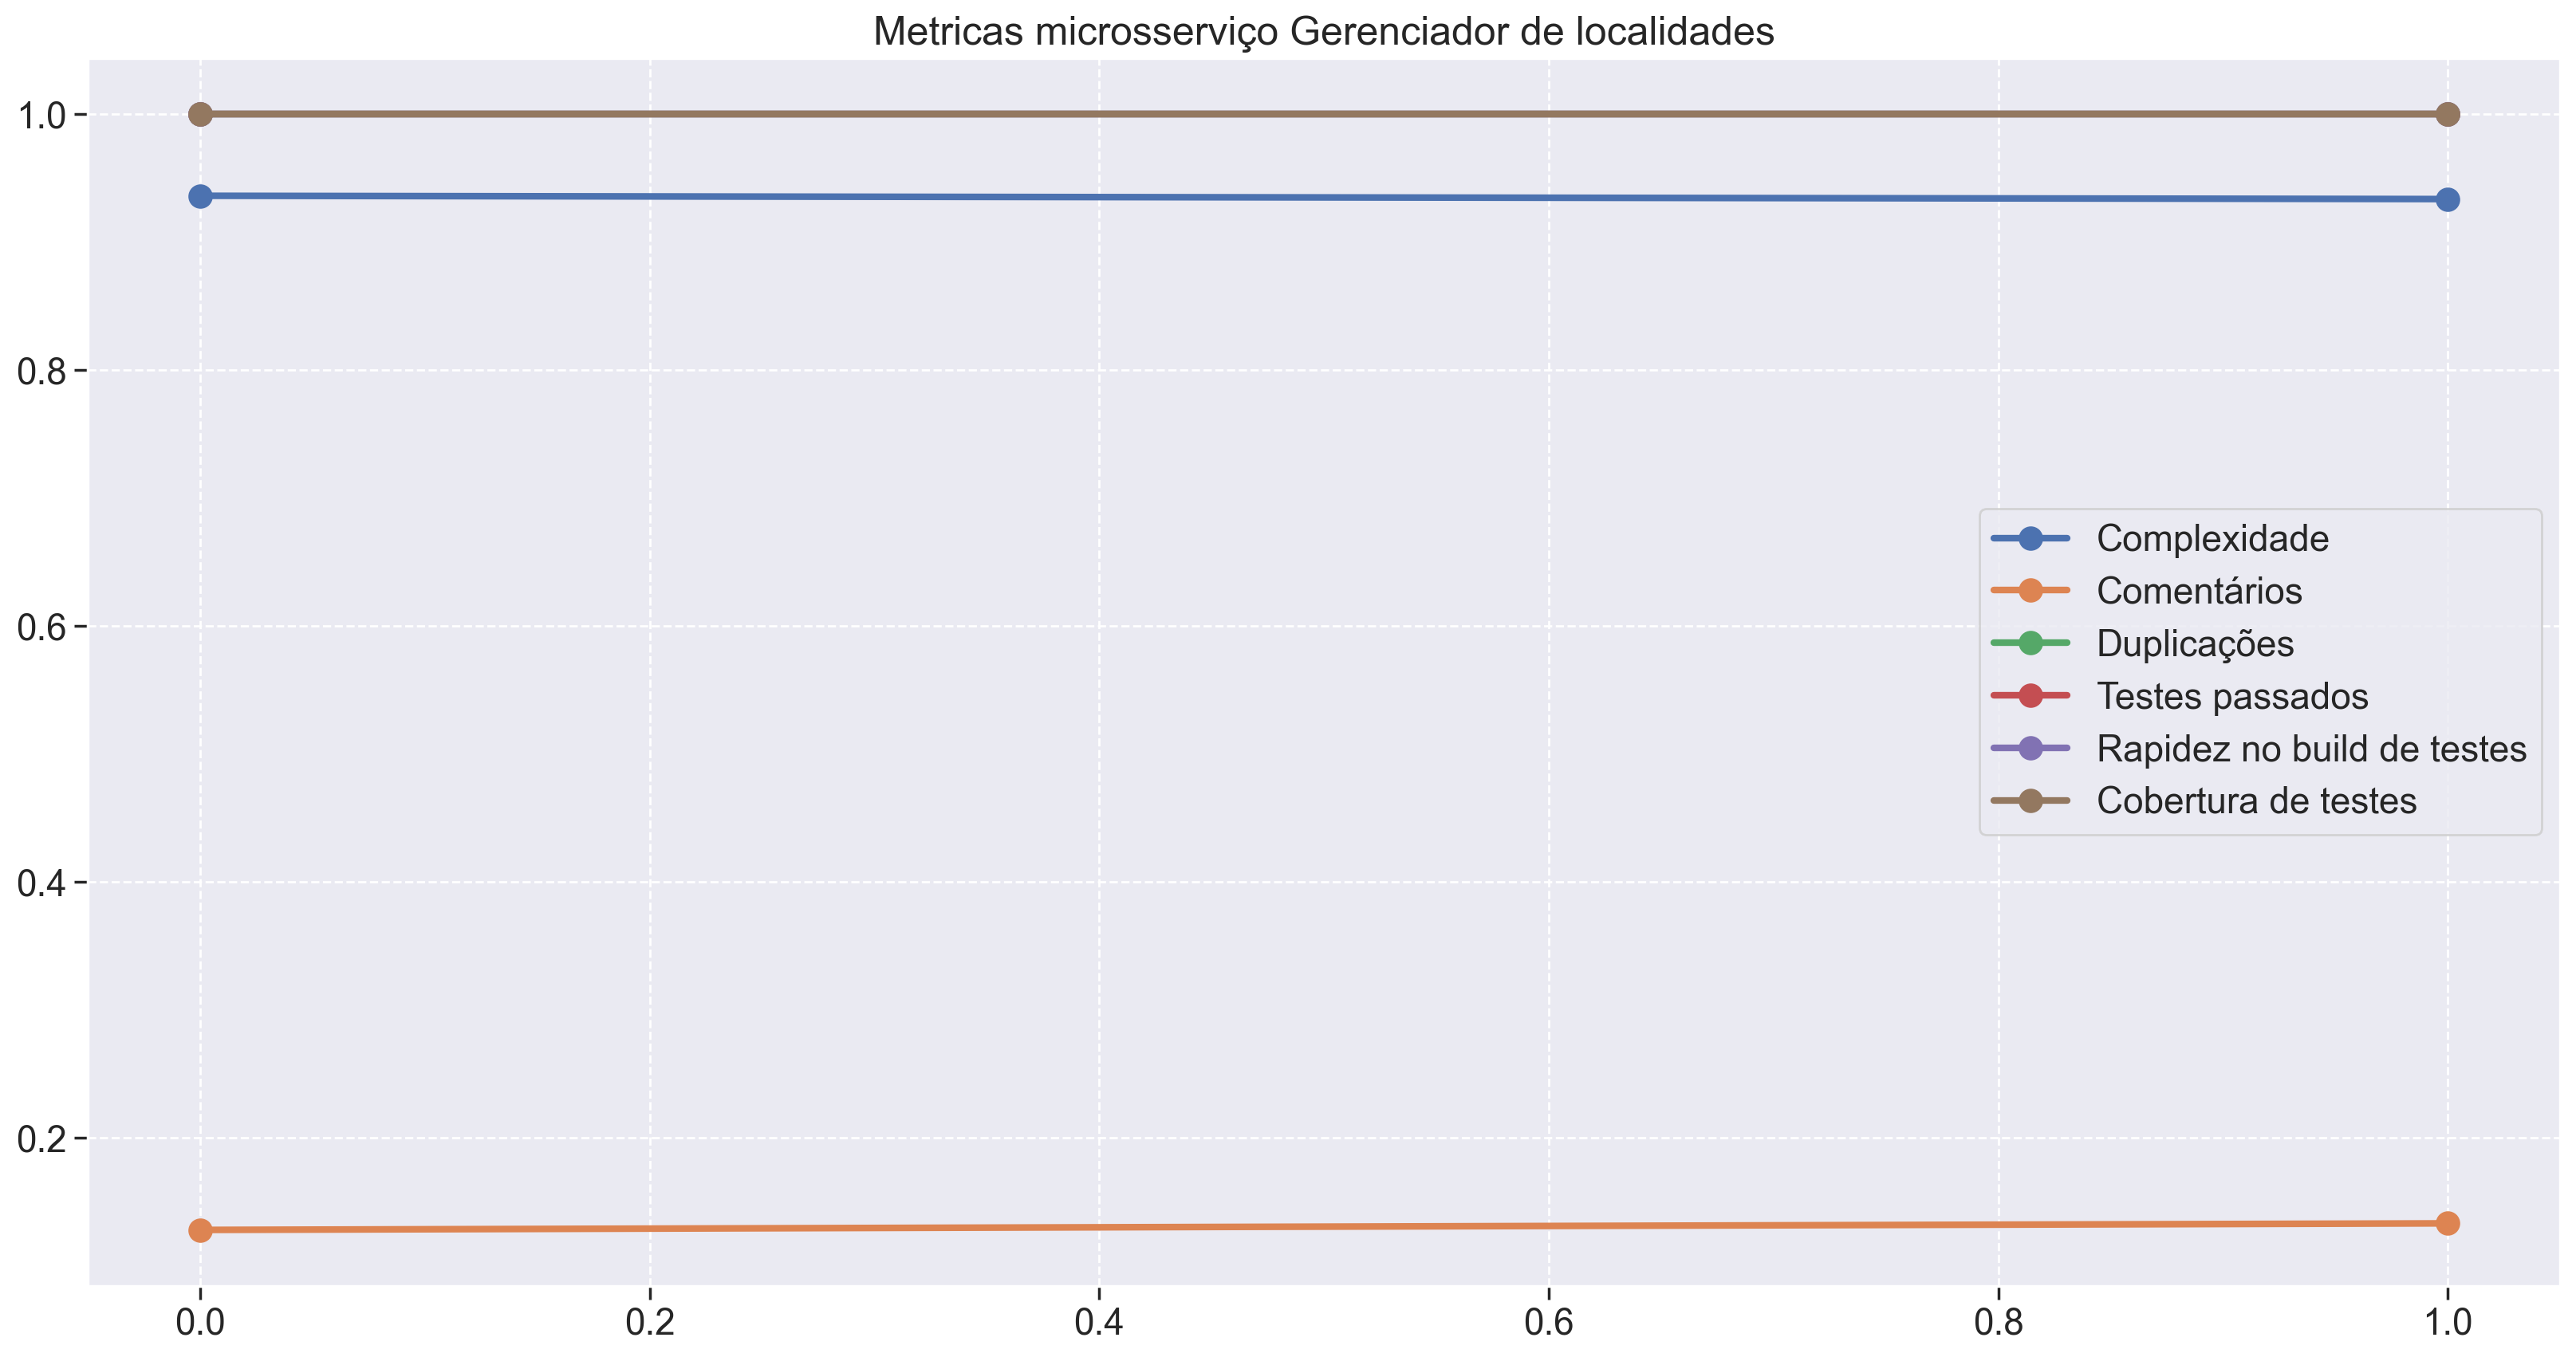

In [114]:
fig = plt.figure(figsize=(20, 10))

plt.title(label="Metricas microsserviço Gerenciador de localidades")

plt.plot(gerenciador_localidades_metrics['m1'], linewidth=3, marker='o', markersize=10, label="Complexidade")
plt.plot(gerenciador_localidades_metrics['m2'], linewidth=3, marker='o', markersize=10, label="Comentários")
plt.plot(gerenciador_localidades_metrics['m3'], linewidth=3, marker='o', markersize=10, label="Duplicações")
plt.plot(gerenciador_localidades_metrics['m4'], linewidth=3, marker='o', markersize=10, label="Testes passados")
plt.plot(gerenciador_localidades_metrics['m5'], linewidth=3, marker='o', markersize=10, label="Rapidez no build de testes")
plt.plot(gerenciador_localidades_metrics['m6'], linewidth=3, marker='o', markersize=10, label="Cobertura de testes")
plt.legend(loc='best')

{'whiskers': [<matplotlib.lines.Line2D at 0x27b8daa0730>,
 'caps': [<matplotlib.lines.Line2D at 0x27b8daa0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b8daa0460>,
 'medians': [<matplotlib.lines.Line2D at 0x27b8daa1270>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b8daa1540>,
 'means': []}

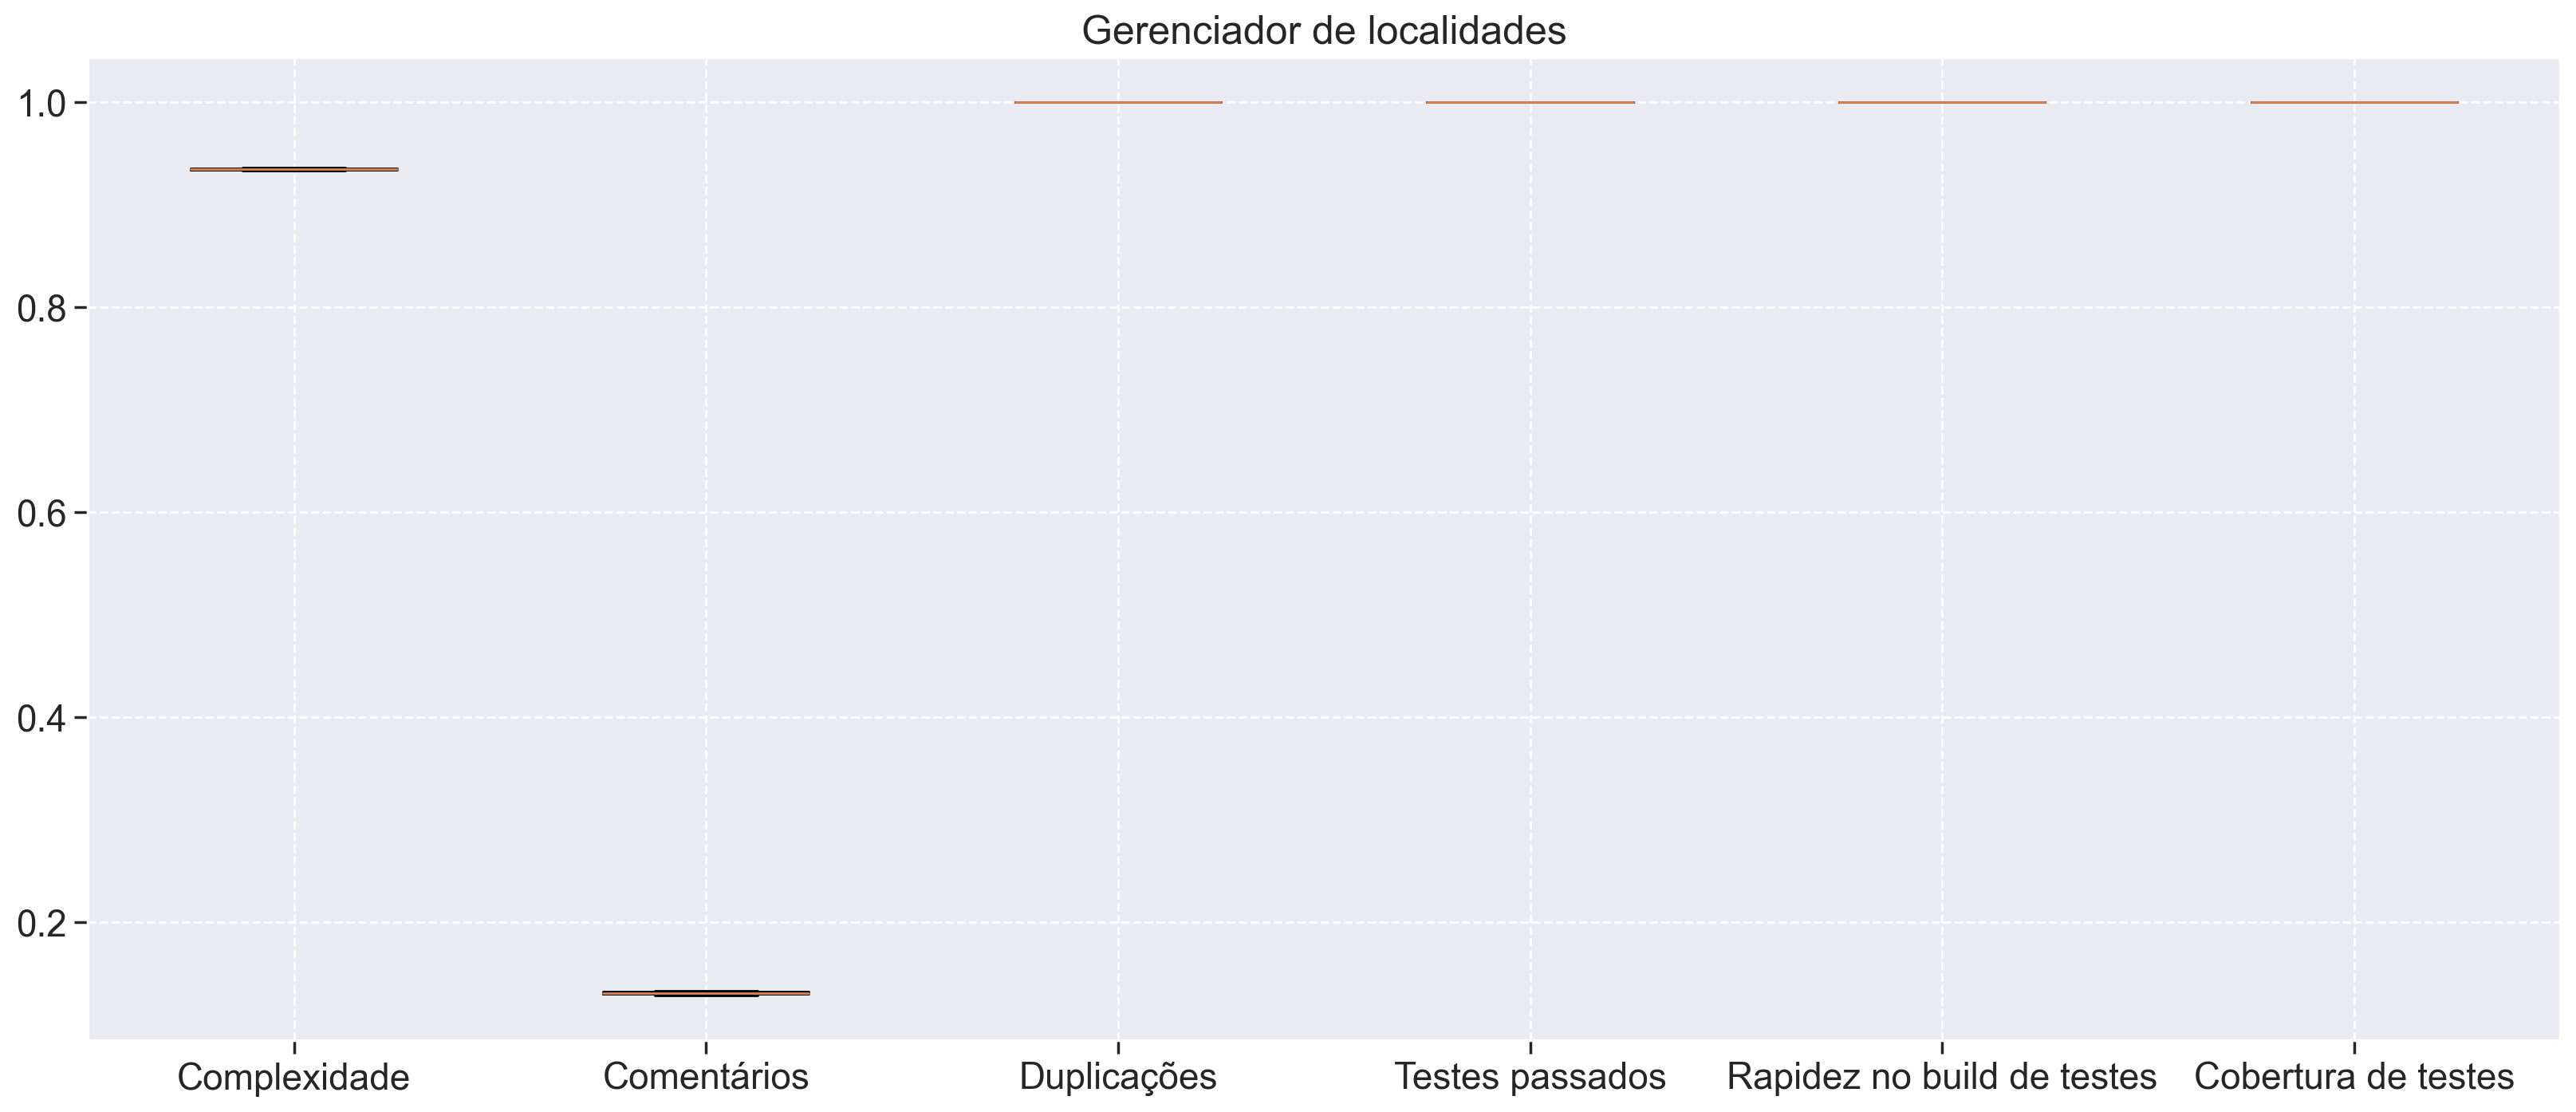

In [115]:
plt.figure(figsize=(20, 8))

# boxplot
plt.title(label="Gerenciador de localidades")
plt.boxplot([
gerenciador_localidades_metrics['m1'],
gerenciador_localidades_metrics['m2'], 
gerenciador_localidades_metrics['m3'], 
gerenciador_localidades_metrics['m4'], 
gerenciador_localidades_metrics['m5'], 
gerenciador_localidades_metrics['m6']],
labels=["Complexidade",
"Comentários",
"Duplicações",
"Testes passados",
"Rapidez no build de testes",
"Cobertura de testes",])


### Sub characteristic aggregation

- You must do this for each of your repositories

In [116]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5

detalhador_chamados = detalhador_chamados_metrics
front = front_metrics
gestor_usuarios = gestor_usuarios_metrics
gerenciador_localidades = gerenciador_localidades_metrics

detalhador_chamados['code_quality'] = ((detalhador_chamados['m1']*pm1) + (detalhador_chamados['m2']*pm2) + (detalhador_chamados['m3']*pm3)) * psc1
front['code_quality'] = ((front['m1']*pm1) + (front['m2']*pm2) + (front['m3']*pm3)) * psc1
gestor_usuarios['code_quality'] = ((gestor_usuarios['m1']*pm1) + (gestor_usuarios['m2']*pm2) + (gestor_usuarios['m3']*pm3)) * psc1
gerenciador_localidades['code_quality'] = ((gerenciador_localidades['m1']*pm1) + (gerenciador_localidades['m2']*pm2) + (gerenciador_localidades['m3']*pm3)) * psc1

detalhador_chamados['testing_status'] = ((detalhador_chamados['m4']*pm4) + (detalhador_chamados['m5']*pm5) + (detalhador_chamados['m6']*pm6)) * psc2
front['testing_status'] = ((front['m4']*pm4) + (front['m5']*pm5) + (front['m6']*pm6)) * psc2
gestor_usuarios['testing_status'] = ((gestor_usuarios['m4']*pm4) + (gestor_usuarios['m5']*pm5) + (gestor_usuarios['m6']*pm6)) * psc2
gerenciador_localidades['testing_status'] = ((gerenciador_localidades['m4']*pm4) + (gerenciador_localidades['m5']*pm5) + (gerenciador_localidades['m6']*pm6)) * psc2


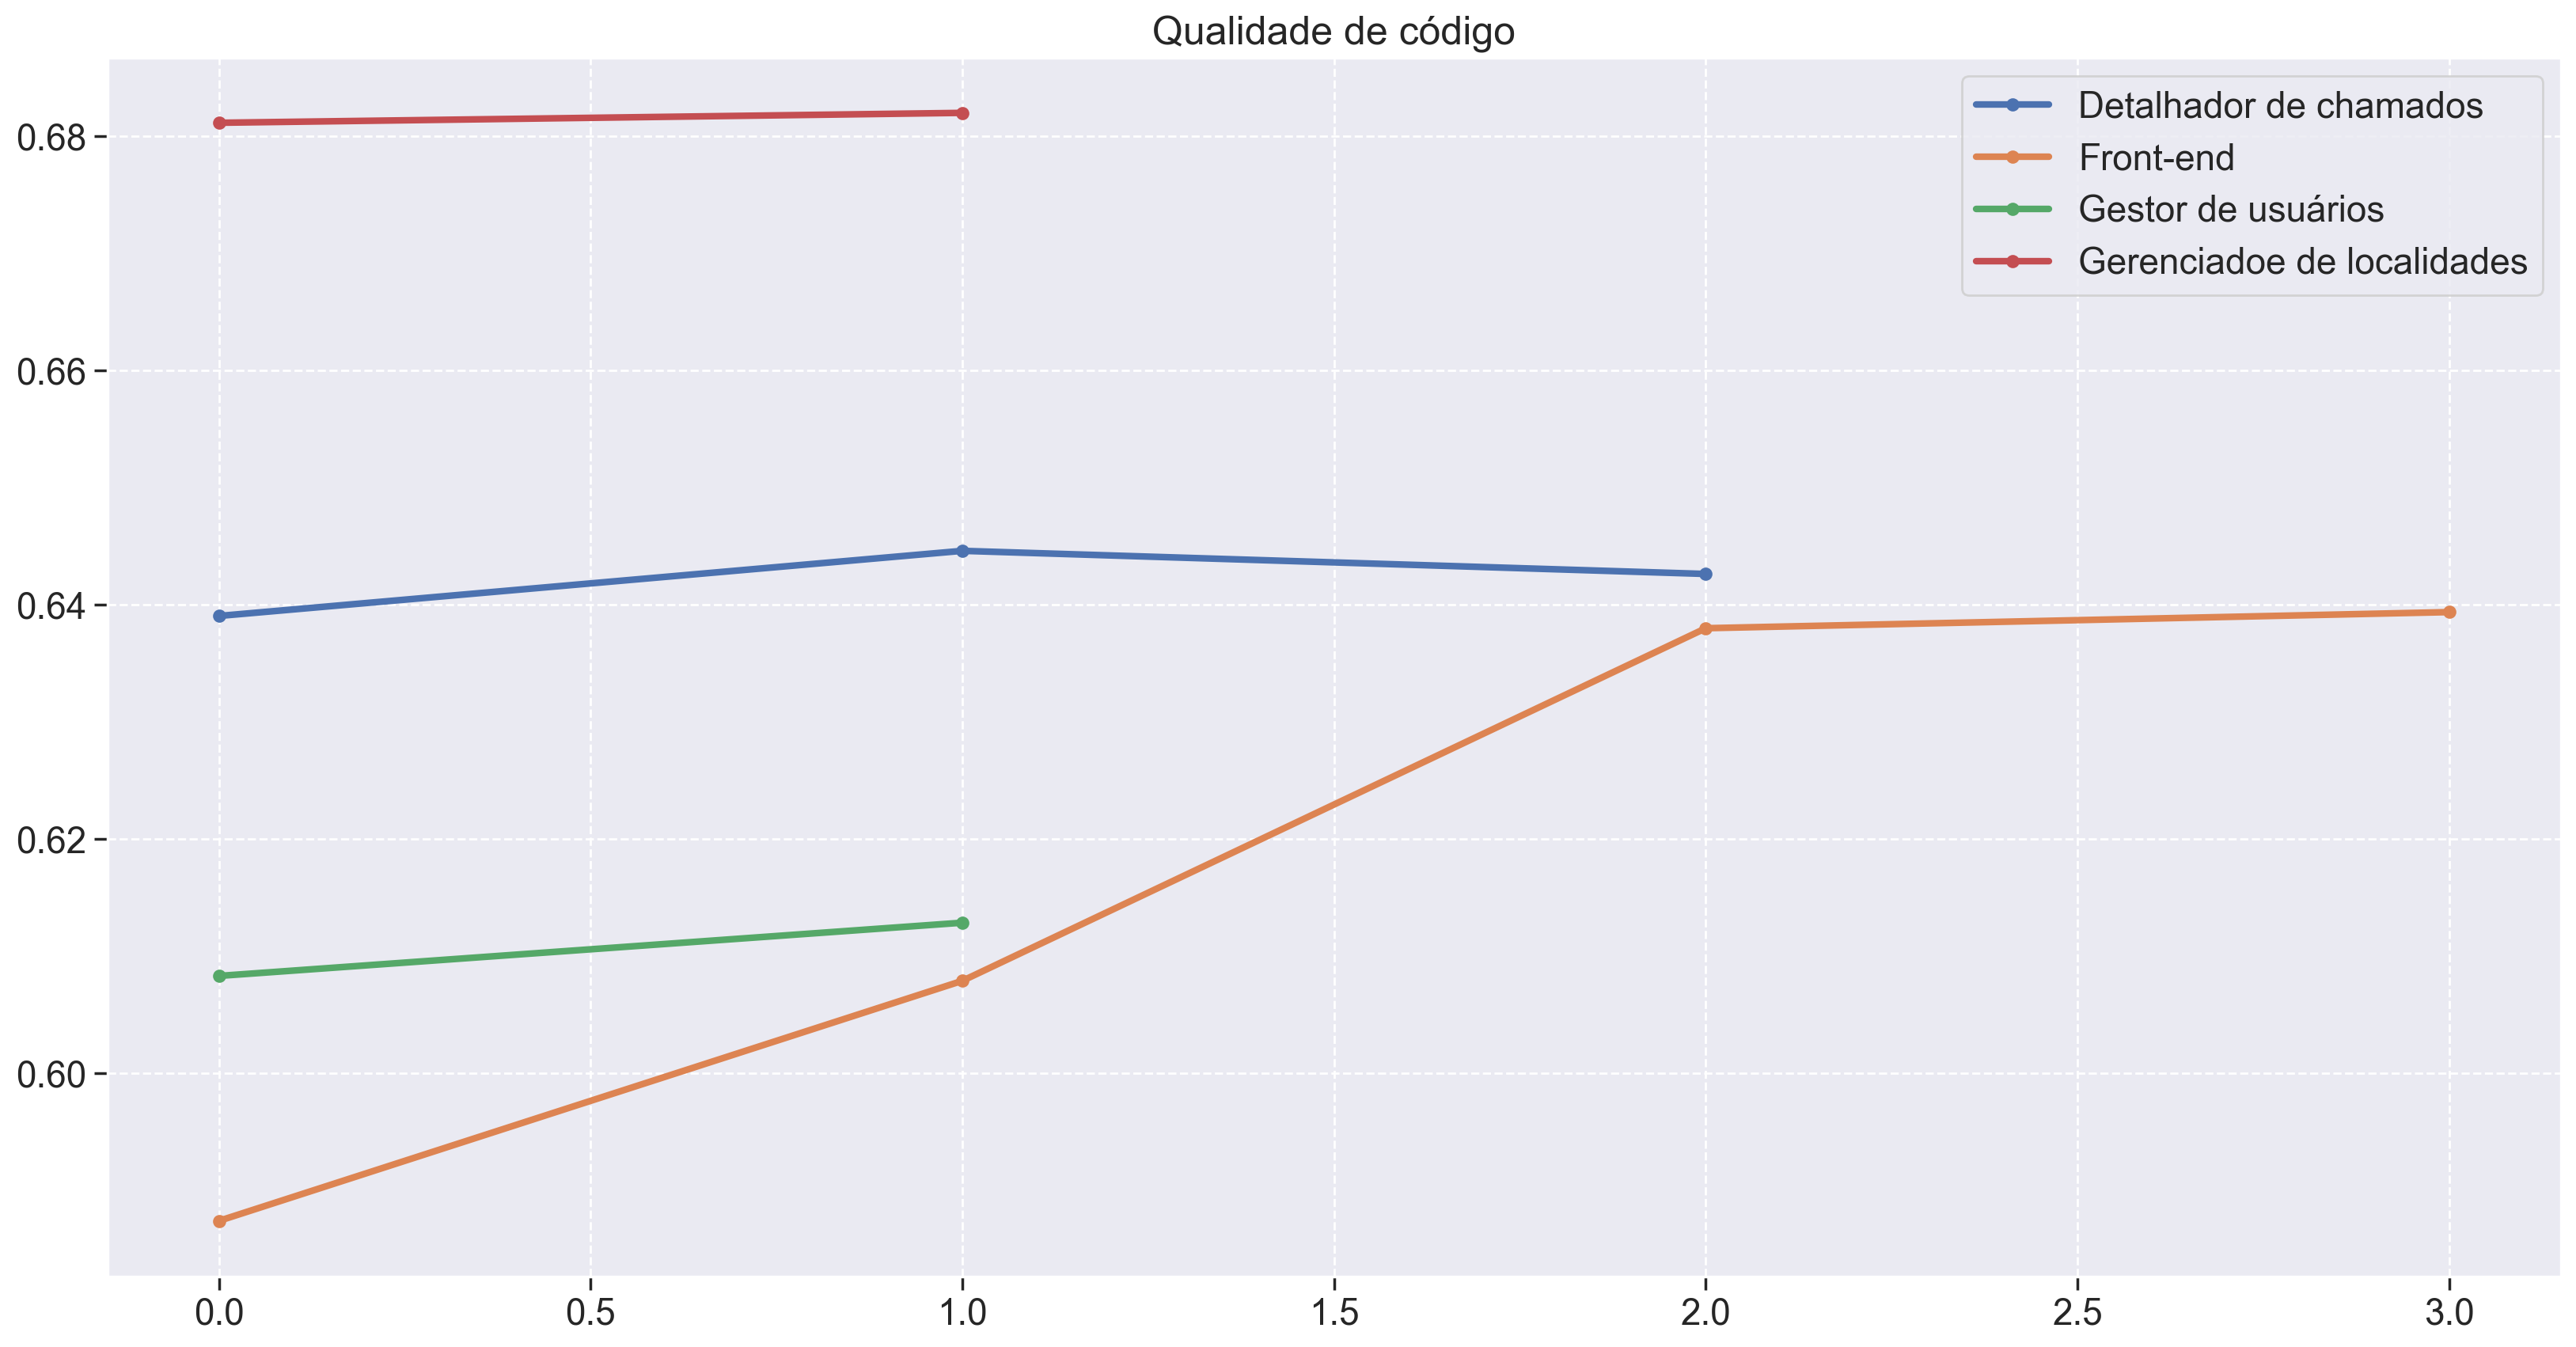

In [117]:
fig = plt.figure(figsize=(20, 10))

plt.title("Qualidade de código")
plt.plot(detalhador_chamados['code_quality'], linewidth=3, marker='o', markersize=5, label="Detalhador de chamados")
plt.plot(front['code_quality'], linewidth=3, marker='o', markersize=5, label="Front-end")
plt.plot(gestor_usuarios['code_quality'], linewidth=3, marker='o', markersize=5, label="Gestor de usuários")
plt.plot(gerenciador_localidades['code_quality'], linewidth=3, marker='o', markersize=5, label="Gerenciadoe de localidades")
plt.legend(loc="best")

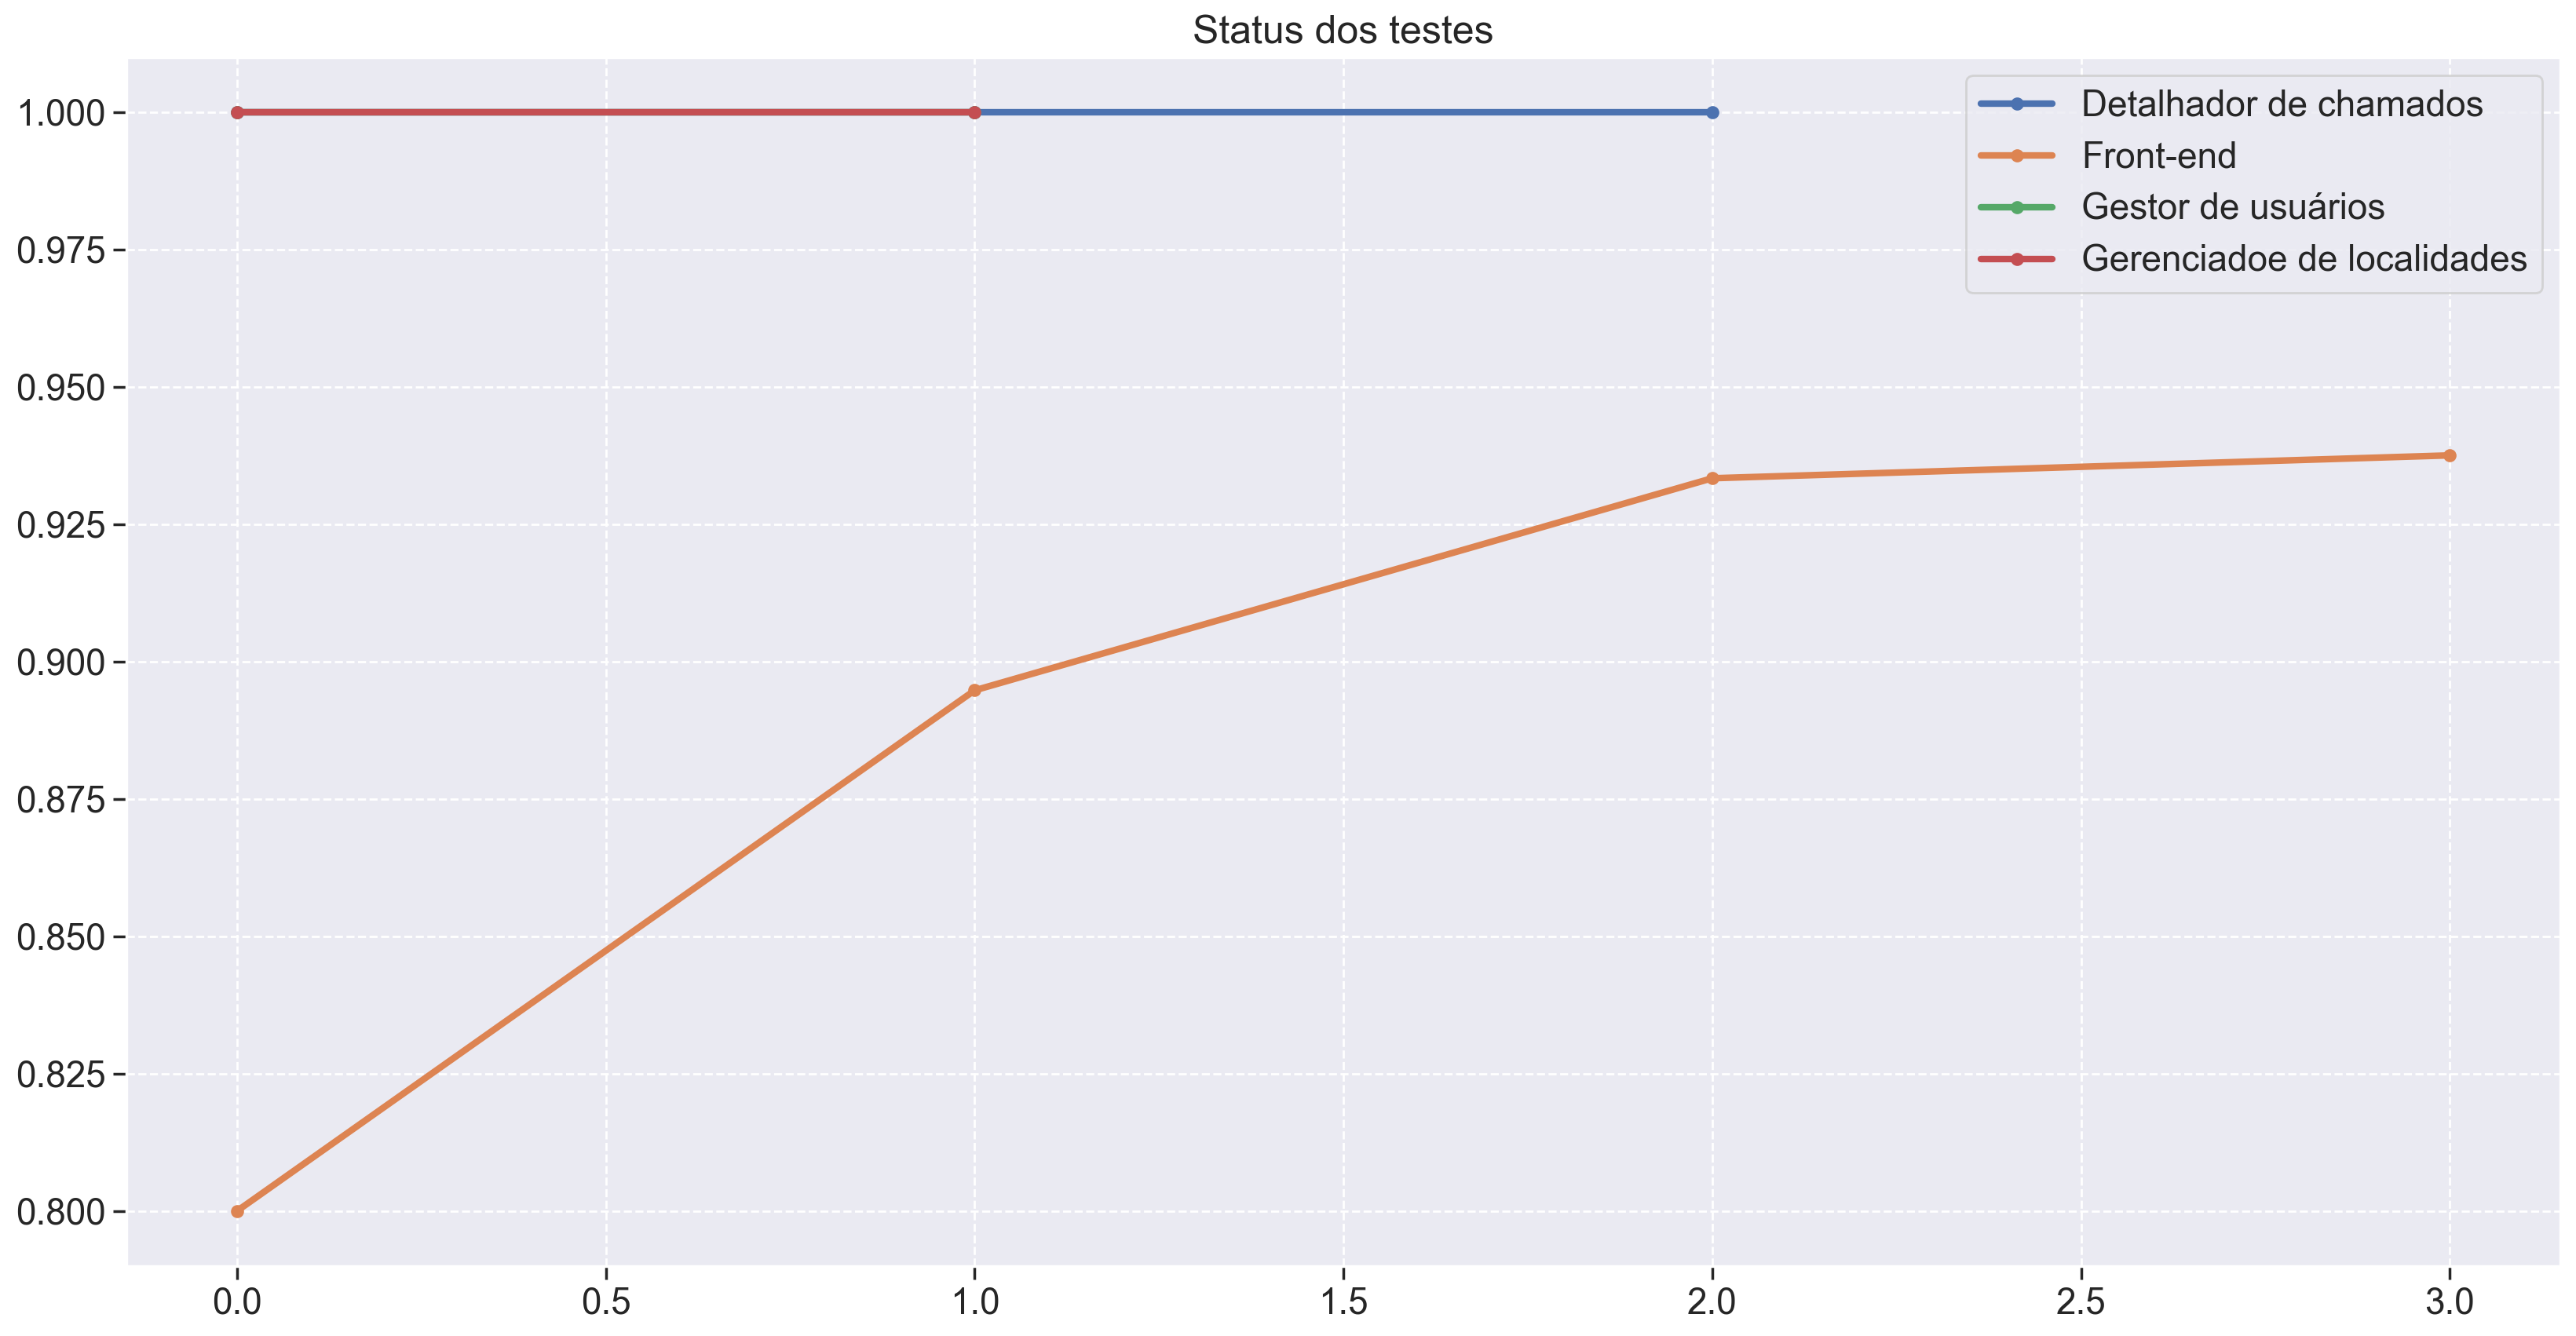

In [118]:
fig = plt.figure(figsize=(20, 10))


plt.title('Status dos testes')
plt.plot(detalhador_chamados['testing_status'], linewidth=3, marker='o', markersize=5, label="Detalhador de chamados")
plt.plot(front['testing_status'], linewidth=3, marker='o', markersize=5, label="Front-end")
plt.plot(gestor_usuarios['testing_status'], linewidth=3, marker='o', markersize=5, label="Gestor de usuários")
plt.plot(gerenciador_localidades['testing_status'], linewidth=3, marker='o', markersize=5,  label="Gerenciadoe de localidades")
plt.legend(loc='best')


In [119]:
metrics_df = pd.concat([detalhador_chamados_metrics, front_metrics, gestor_usuarios_metrics, gerenciador_localidades_metrics], ignore_index=True)

metrics_df['Maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['Maintainability'] + metrics_df['Reliability']

metrics_df.to_excel('data/fga-eps-mds-2022_1-Schedula-ANALYSYS.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2022_1-Schedula-ANALYSYS.csv', index = False)

dfs = [detalhador_chamados_metrics, front_metrics, gestor_usuarios_metrics, gerenciador_localidades_metrics]
for df in dfs:
  df['Maintainability'] = df['code_quality'] * pc1
  df['Reliability'] = df['testing_status'] * pc2
  df['total'] = df['Maintainability'] + df['Reliability']

## Confiabilidade
Confiabilidade (Reliability): Capacidade do produto de software de manter um nível de desempenho especificado, quando usado em condições especificadas.Usando as métricas m4, m5, m6, fizemos um cálculo da confiabilidade dos repositórios do projeto afim de compararmos com a métrica de manutenibilidade.



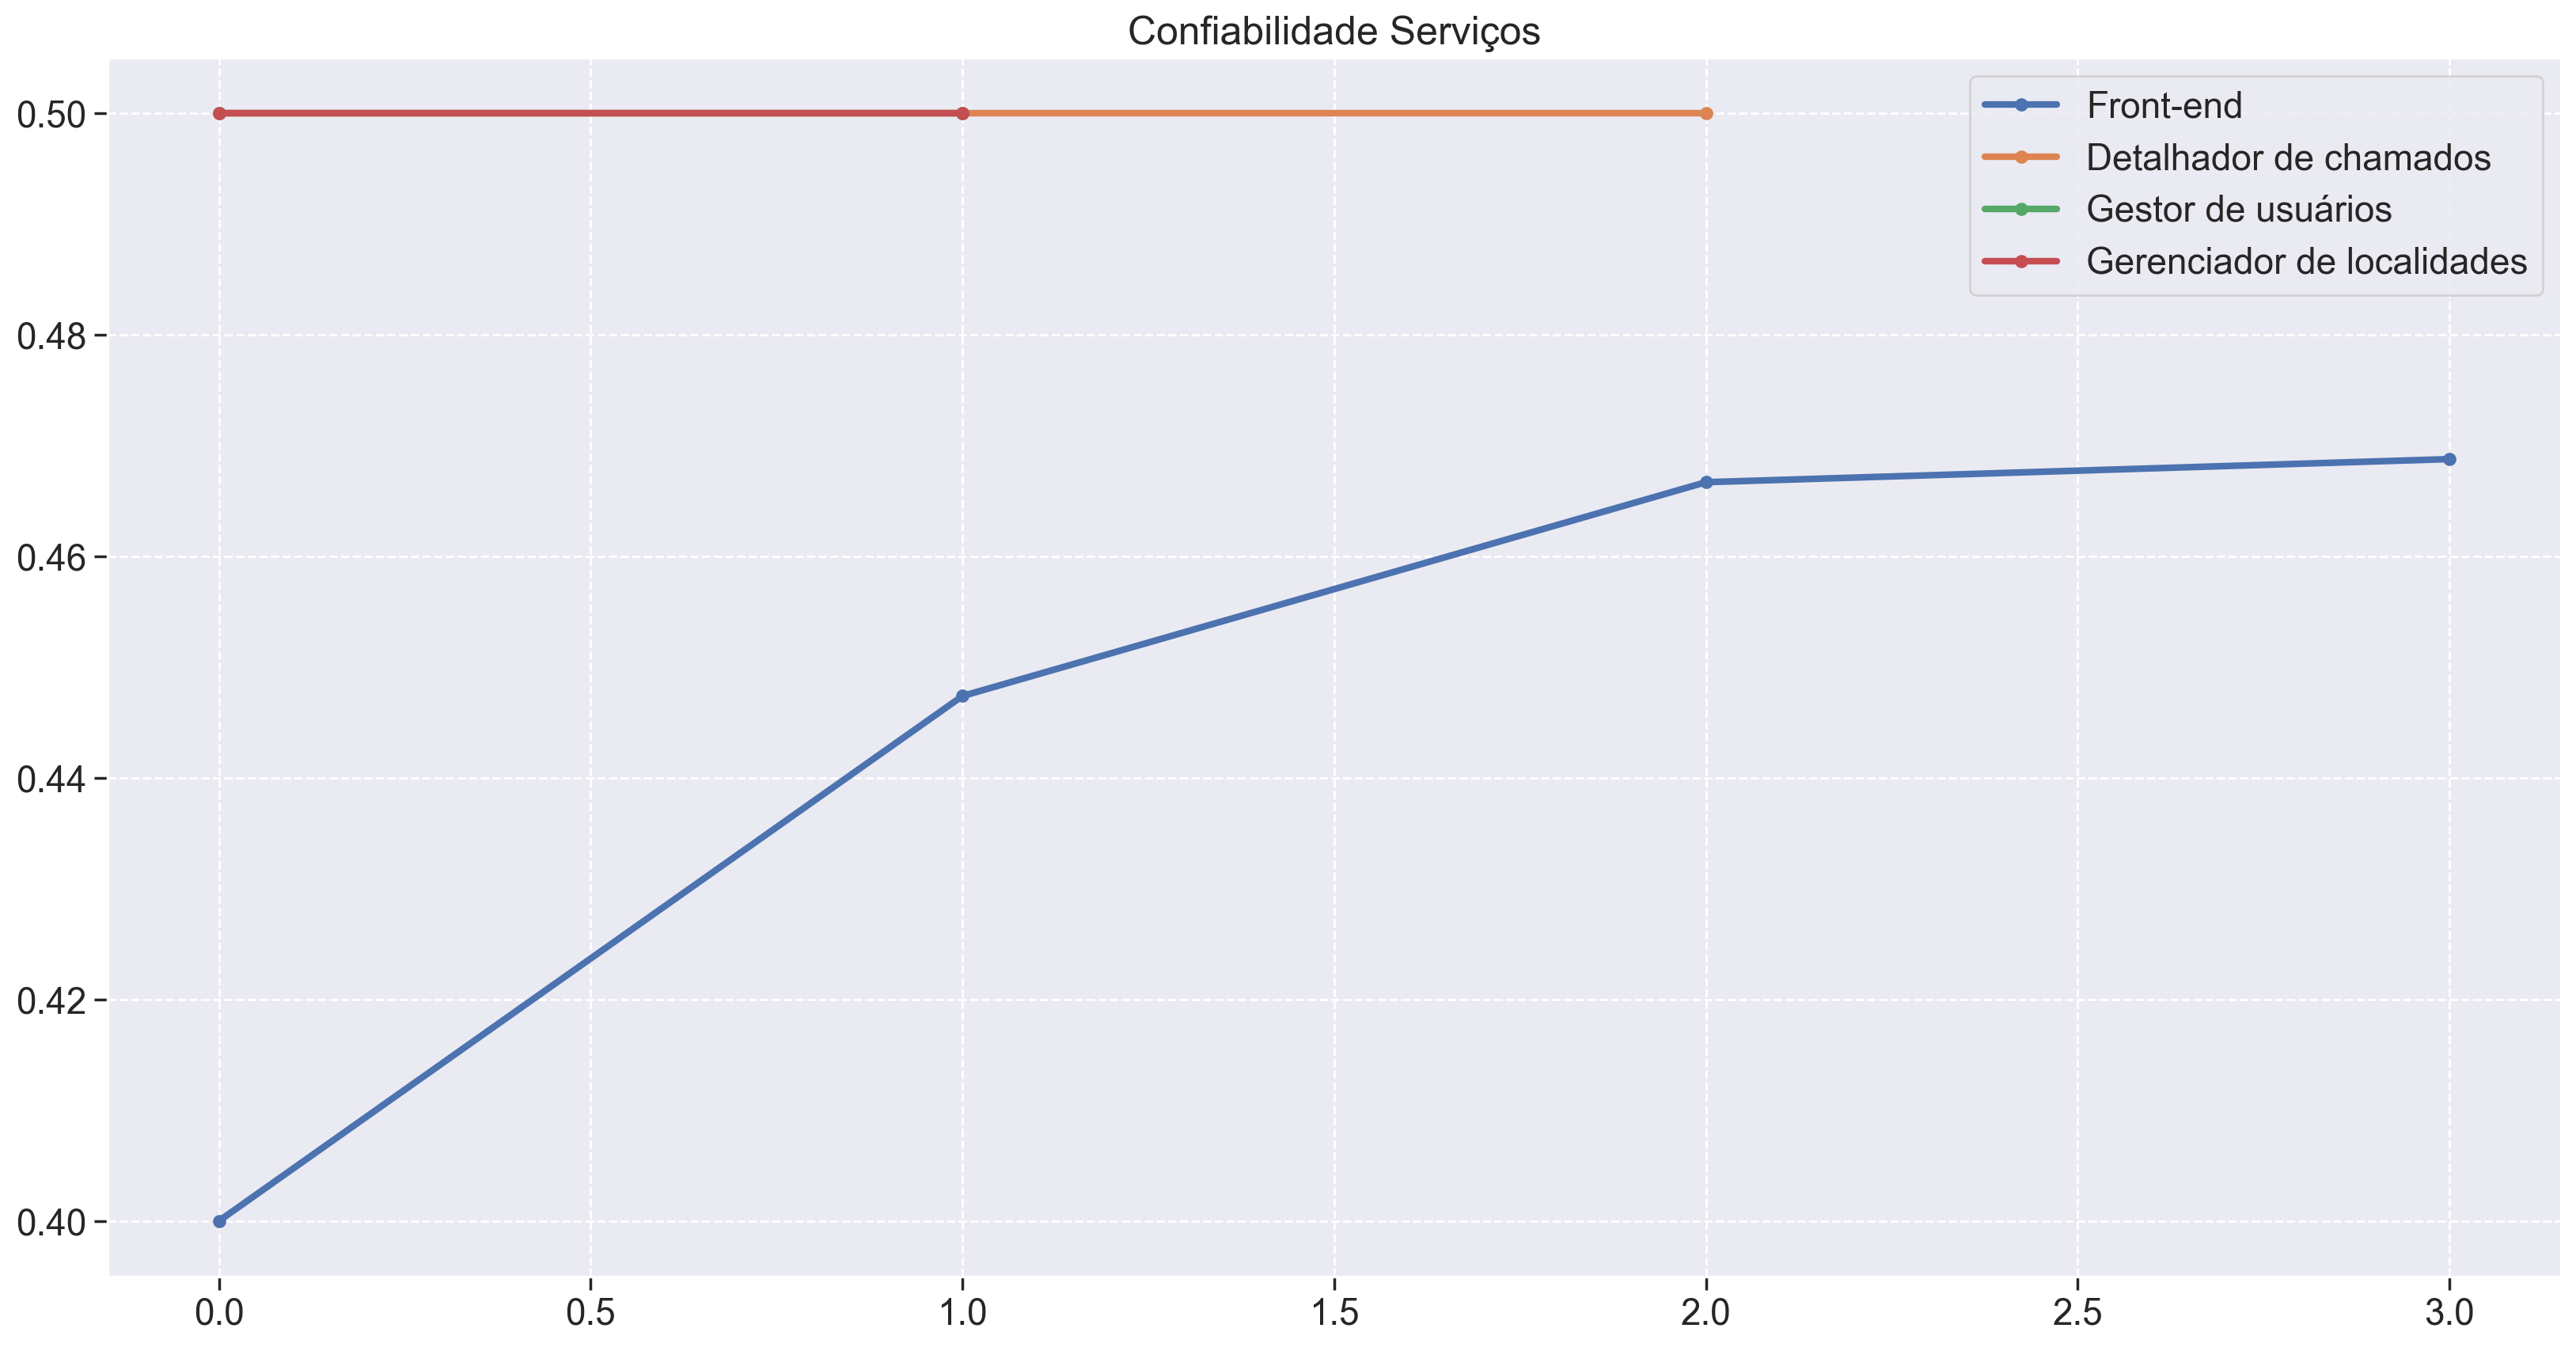

In [120]:
fig = plt.figure(figsize=(20, 10))

plt.title('Confiabilidade Serviços')

plt.plot(front_metrics['Reliability'], linewidth=3, marker='o', markersize=5, label="Front-end")
plt.plot(detalhador_chamados_metrics['Reliability'], linewidth=3, marker='o', markersize=5, label="Detalhador de chamados")
plt.plot(gestor_usuarios_metrics['Reliability'], linewidth=3, marker='o', markersize=5, label="Gestor de usuários")
plt.plot(gerenciador_localidades_metrics['Reliability'], linewidth=3, marker='o', markersize=5, label="Gerenciador de localidades")
plt.legend(loc='best')


## Manutenabilidade
Manutenibilidade (Maintainability): Essa métrica nos diz respeito a capacidade do produto de software de ser modificado. As modificações podem incluir correções, melhorias ou adaptações. Usando as métricas m1, m2, m3, fizemos um cálculo da manutenibilidade dos repositórios do projeto afim de compararmos com a métrica de confiabilidade.

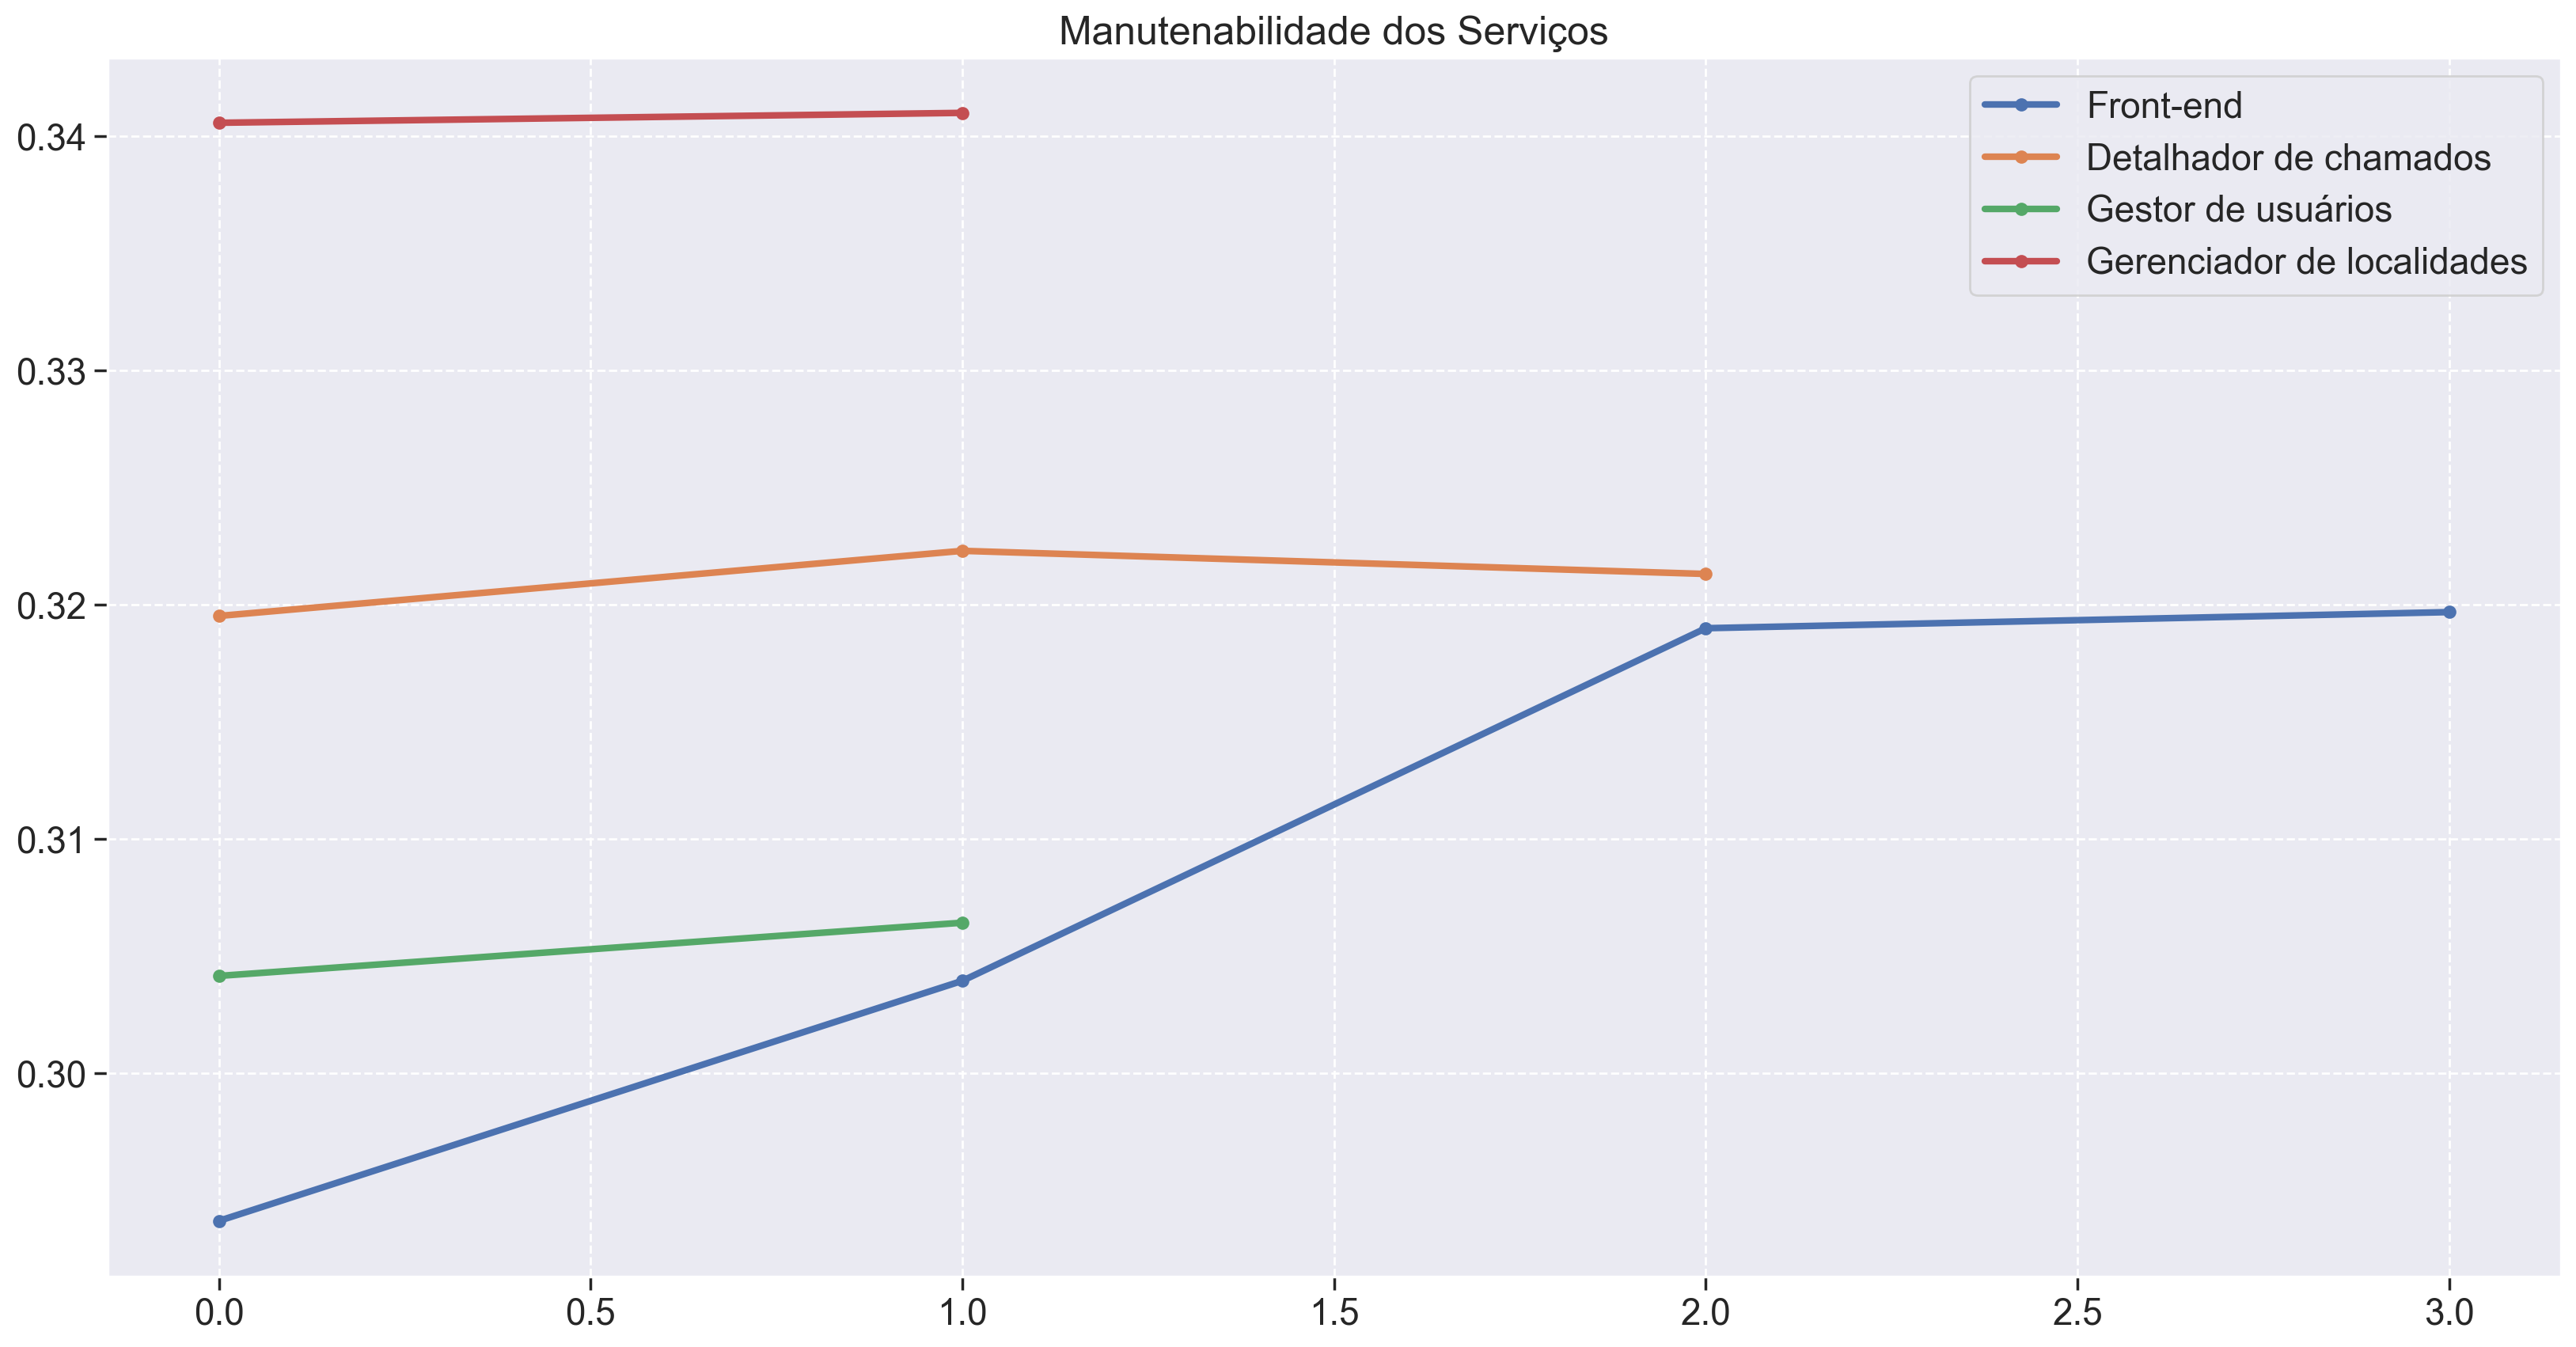

In [121]:
fig = plt.figure(figsize=(20, 10))

plt.title('Manutenabilidade dos Serviços')

plt.plot(front_metrics['Maintainability'], linewidth=3, marker='o', markersize=5, label="Front-end")
plt.plot(detalhador_chamados_metrics['Maintainability'], linewidth=3, marker='o', markersize=5, label="Detalhador de chamados")
plt.plot(gestor_usuarios_metrics['Maintainability'], linewidth=3, marker='o', markersize=5, label="Gestor de usuários")
plt.plot(gerenciador_localidades_metrics['Maintainability'], linewidth=3, marker='o', markersize=5, label="Gerenciador de localidades")
plt.legend(loc='best')

### You must do the total plot and the statics analysis for the repository with more versions.

In [122]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.936508,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,2171,0.639048,1.000000,0.319524,0.500000,0.819524
1,0.953353,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.1.0,16635,0.644606,1.000000,0.322303,0.500000,0.822303
2,0.947368,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.2.0,7569,0.642632,1.000000,0.321316,0.500000,0.821316
3,0.940000,0.040000,0.800000,0.800000,0.800000,0.800000,fga-eps-mds-2022-1-schedula-front,1.0.0,3301,0.587400,0.800000,0.293700,0.400000,0.693700
4,0.947368,0.000000,0.894737,0.894737,0.894737,0.894737,fga-eps-mds-2022-1-schedula-front,1.1.1,1070,0.607895,0.894737,0.303947,0.447368,0.751316
5,0.966667,0.033333,0.933333,0.933333,0.933333,0.933333,fga-eps-mds-2022-1-schedula-front,1.1.2,1753,0.638000,0.933333,0.319000,0.466667,0.785667
6,0.968750,0.031250,0.937500,0.937500,0.937500,0.937500,fga-eps-mds-2022-1-schedula-front,1.2.0,2289,0.639375,0.937500,0.319688,0.468750,0.788438
7,0.843373,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.0,3769,0.608313,1.000000,0.304157,0.500000,0.804157
8,0.857143,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.1,2416,0.612857,1.000000,0.306429,0.500000,0.806429
9,0.935897,0.128205,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gerenciador_de_loc...,1.0.0,3525,0.681154,1.000000,0.340577,0.500000,0.840577


In [151]:
# Building descriptive statistics dataframe

more_versions_front = front_metrics
more_versions_detalhador_chamados = detalhador_chamados_metrics

def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

maintainability_stats = pd.DataFrame(get_characteristc_stats(metrics_df["Maintainability"]),
                                    columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])
reliability_stats = pd.DataFrame(get_characteristc_stats(metrics_df["Reliability"]),
                                columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

In [149]:
print("Confiabilidade")
reliability_stats

Confiabilidade


,mean,mode,median,std,var,min,max
0,0.480253,0.5,0.5,0.032509,0.001057,0.4,0.5


In [150]:

print("Manutenabilidade")
maintainability_stats

Manutenabilidade


,mean,mode,median,std,var,min,max
0,0.317422,0.293700,0.319524,0.014779,0.000218,0.2937,0.341
1,0.317422,0.303947,0.319524,0.014779,0.000218,0.2937,0.341
2,0.317422,0.304157,0.319524,0.014779,0.000218,0.2937,0.341
3,0.317422,0.306429,0.319524,0.014779,0.000218,0.2937,0.341
4,0.317422,0.319000,0.319524,0.014779,0.000218,0.2937,0.341
5,0.317422,0.319524,0.319524,0.014779,0.000218,0.2937,0.341
6,0.317422,0.319688,0.319524,0.014779,0.000218,0.2937,0.341
7,0.317422,0.321316,0.319524,0.014779,0.000218,0.2937,0.341
8,0.317422,0.322303,0.319524,0.014779,0.000218,0.2937,0.341
9,0.317422,0.340577,0.319524,0.014779,0.000218,0.2937,0.341


In [126]:
### Plotting the aggregated quality characteristc indicator

{'whiskers': [<matplotlib.lines.Line2D at 0x27bacf37790>,
 'caps': [<matplotlib.lines.Line2D at 0x27bacf37d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27bacf374c0>,
 'medians': [<matplotlib.lines.Line2D at 0x27bacf5c310>,
 'fliers': [<matplotlib.lines.Line2D at 0x27bacf5c5e0>,
 'means': []}

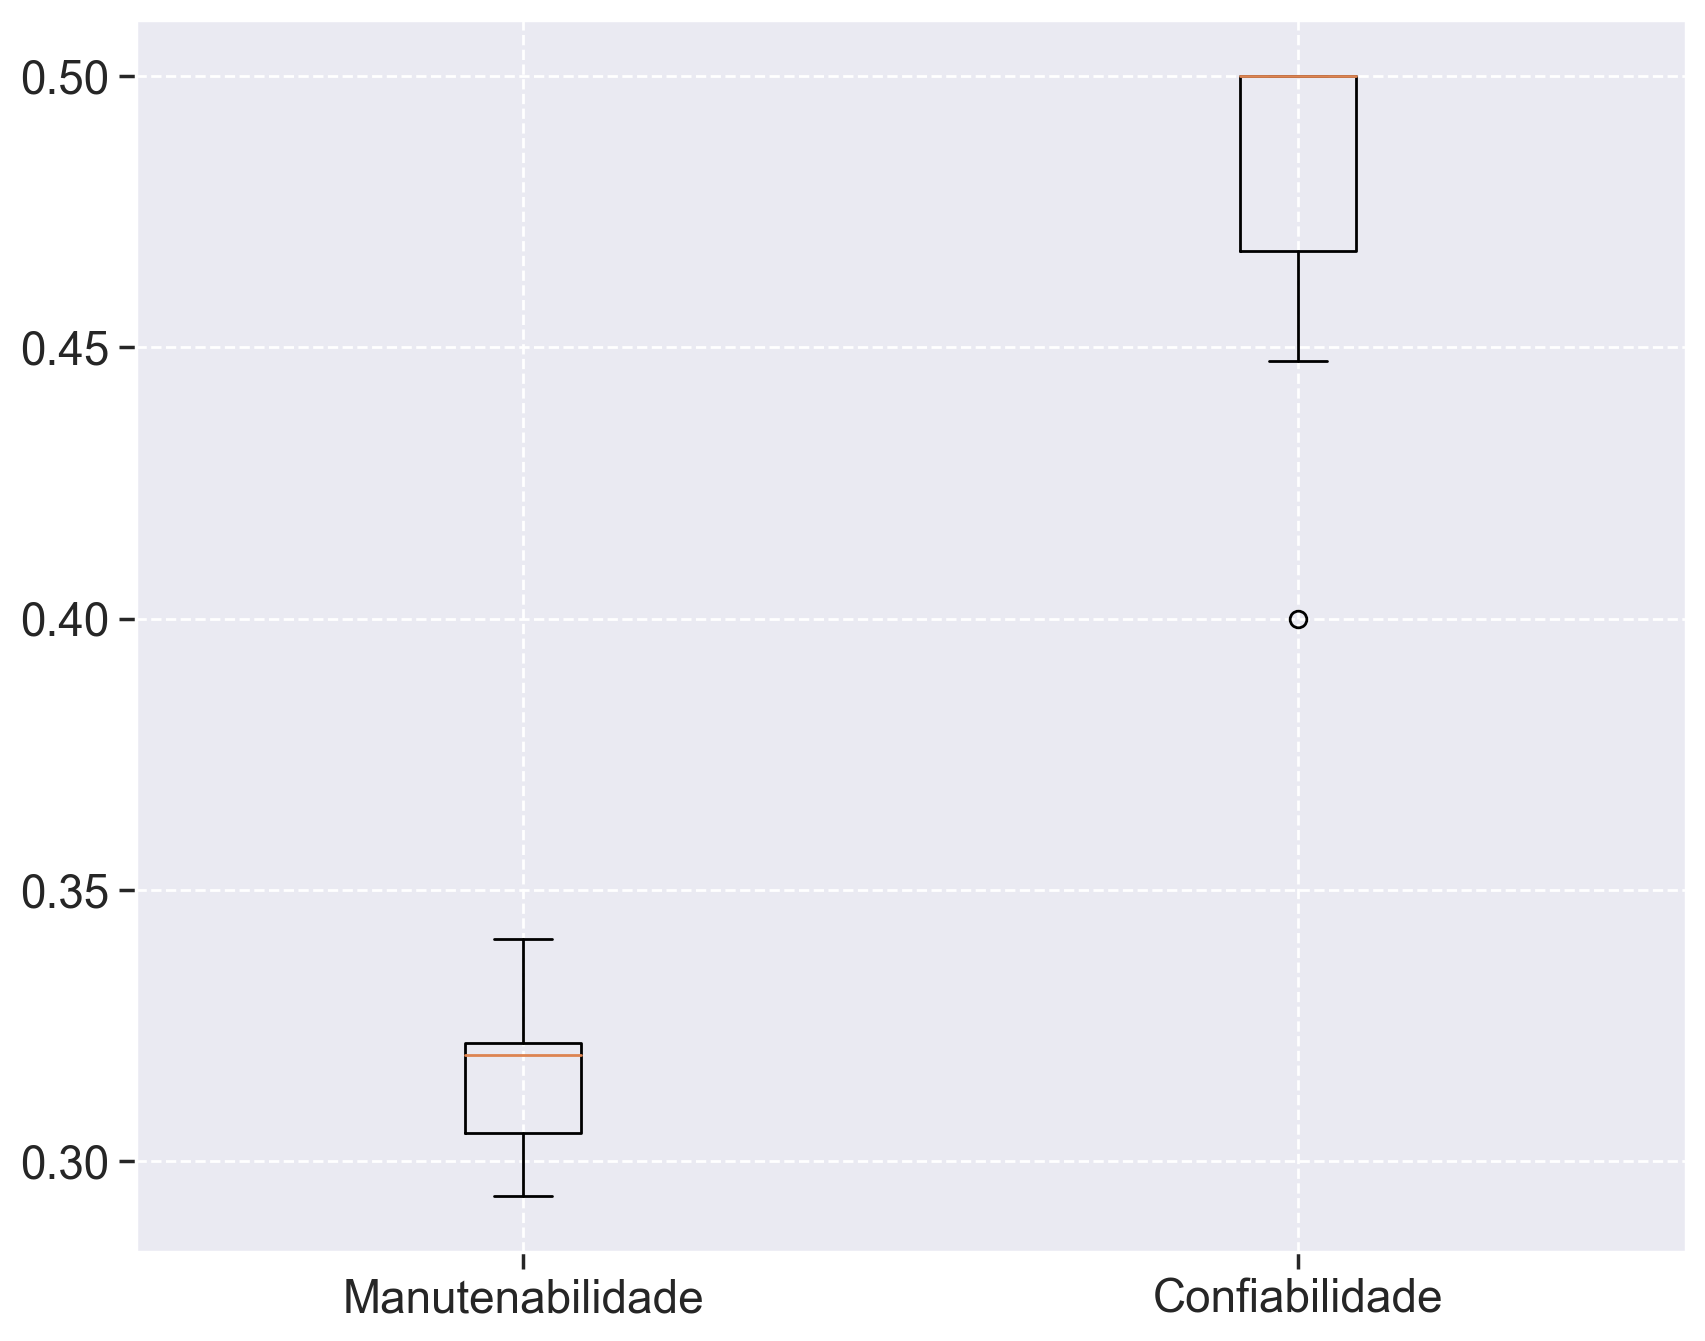

In [156]:
plt.figure(figsize=(10, 8))

# boxplot
plt.boxplot([metrics_df['Maintainability'], metrics_df['Reliability']],
labels=['Manutenabilidade', 'Confiabilidade'])

In [132]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.936508,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.0.0,2171,0.639048,1.000000,0.319524,0.500000,0.819524
1,0.953353,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.1.0,16635,0.644606,1.000000,0.322303,0.500000,0.822303
2,0.947368,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-detalhador_de_cham...,1.2.0,7569,0.642632,1.000000,0.321316,0.500000,0.821316
3,0.940000,0.040000,0.800000,0.800000,0.800000,0.800000,fga-eps-mds-2022-1-schedula-front,1.0.0,3301,0.587400,0.800000,0.293700,0.400000,0.693700
4,0.947368,0.000000,0.894737,0.894737,0.894737,0.894737,fga-eps-mds-2022-1-schedula-front,1.1.1,1070,0.607895,0.894737,0.303947,0.447368,0.751316
5,0.966667,0.033333,0.933333,0.933333,0.933333,0.933333,fga-eps-mds-2022-1-schedula-front,1.1.2,1753,0.638000,0.933333,0.319000,0.466667,0.785667
6,0.968750,0.031250,0.937500,0.937500,0.937500,0.937500,fga-eps-mds-2022-1-schedula-front,1.2.0,2289,0.639375,0.937500,0.319688,0.468750,0.788438
7,0.843373,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.0,3769,0.608313,1.000000,0.304157,0.500000,0.804157
8,0.857143,0.000000,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gestor_de_usuarios,1.0.1,2416,0.612857,1.000000,0.306429,0.500000,0.806429
9,0.935897,0.128205,1.000000,1.000000,1.000000,1.000000,fga-eps-mds-2022-1-schedula-gerenciador_de_loc...,1.0.0,3525,0.681154,1.000000,0.340577,0.500000,0.840577


### Histograma de métricas

<Figure size 500x300 with 0 Axes>

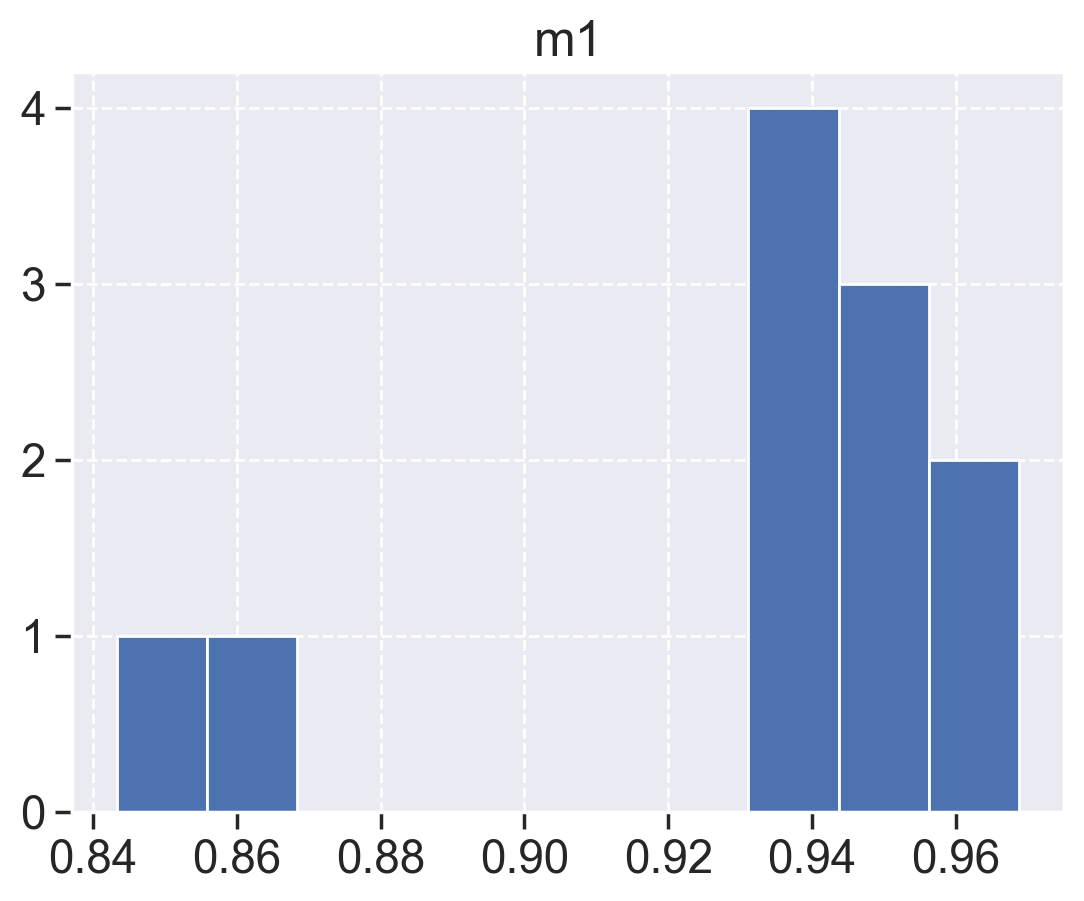

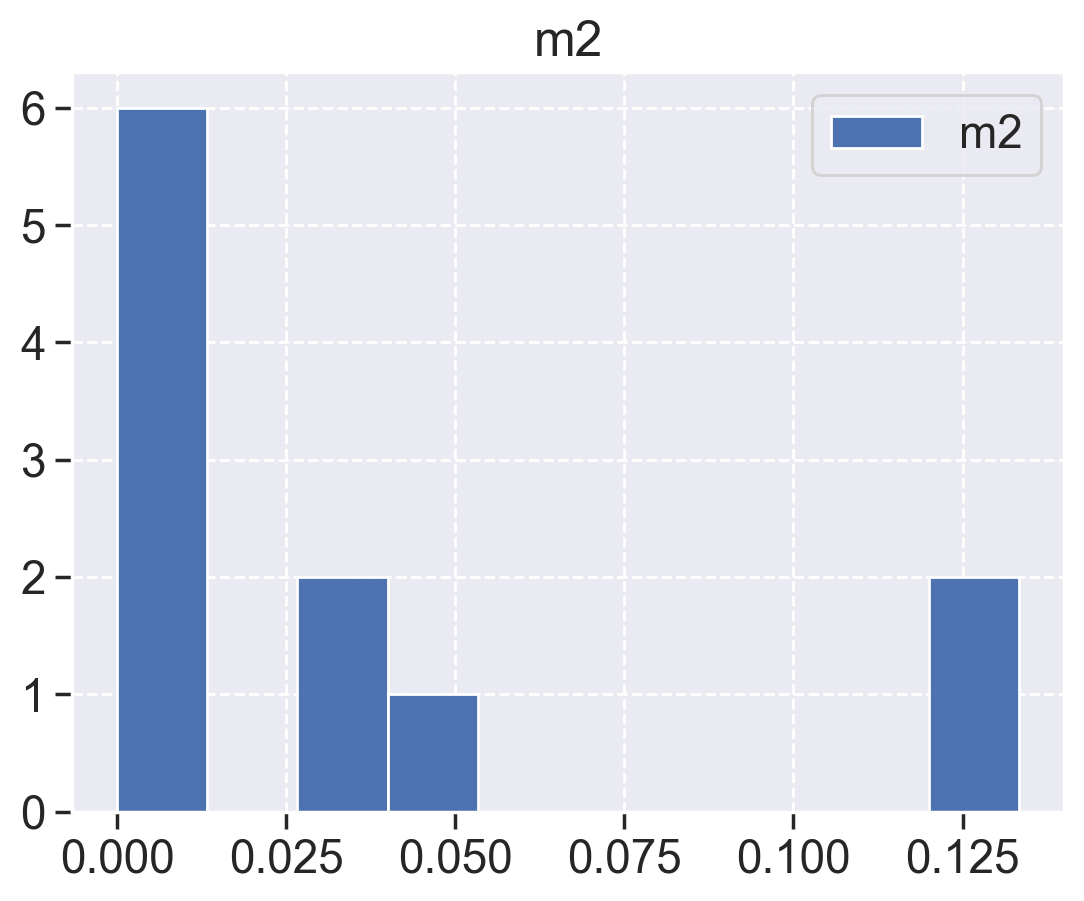

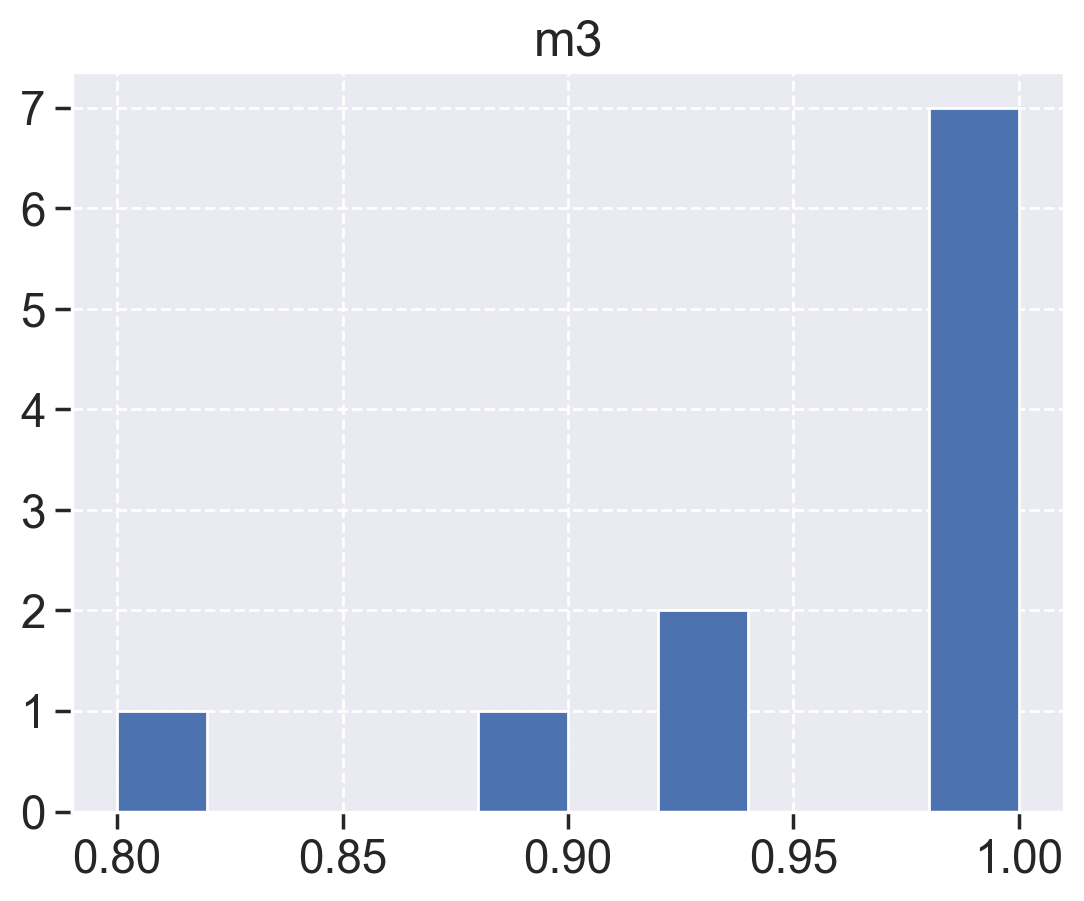

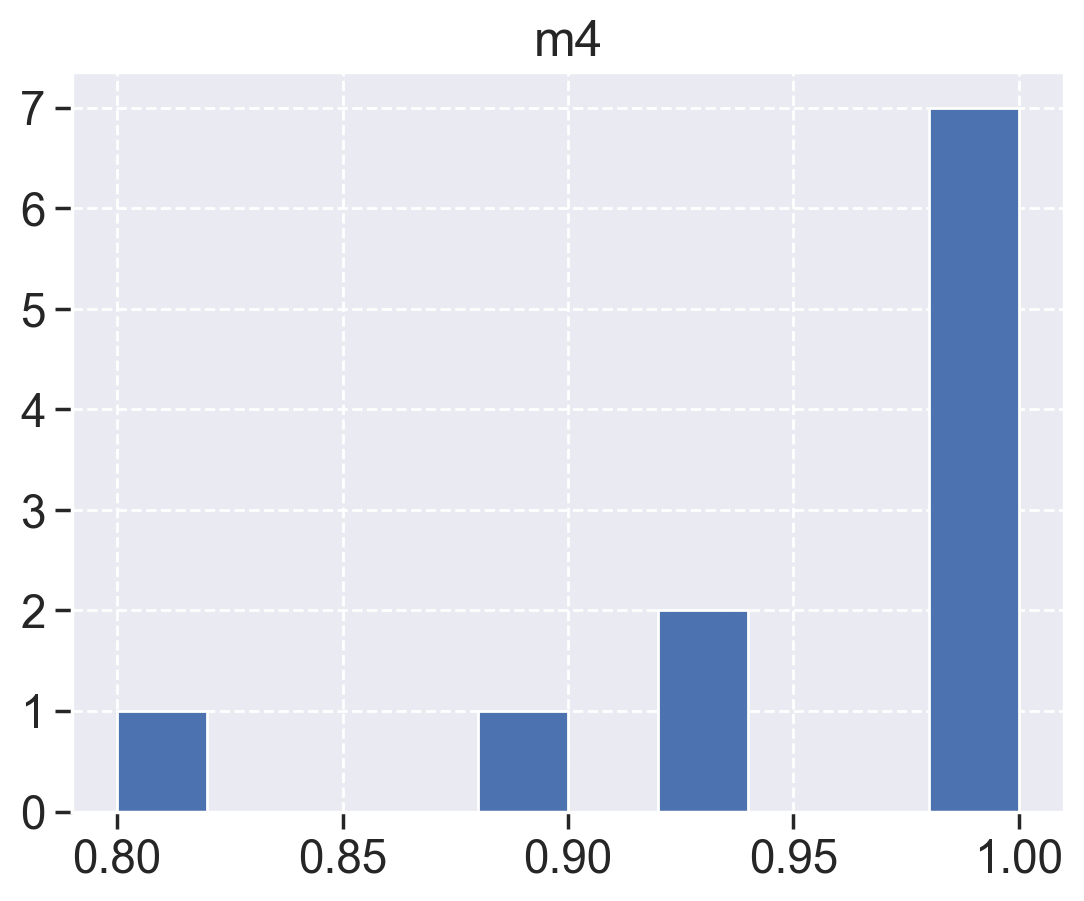

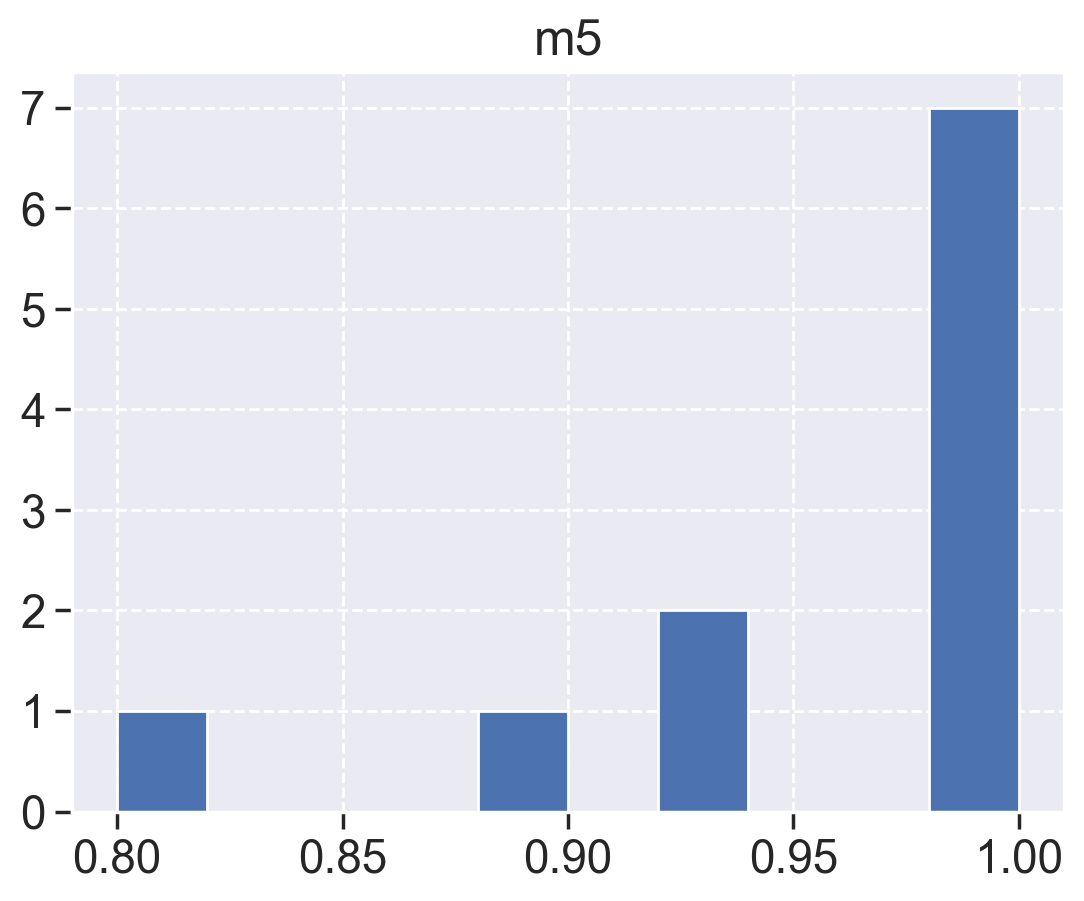

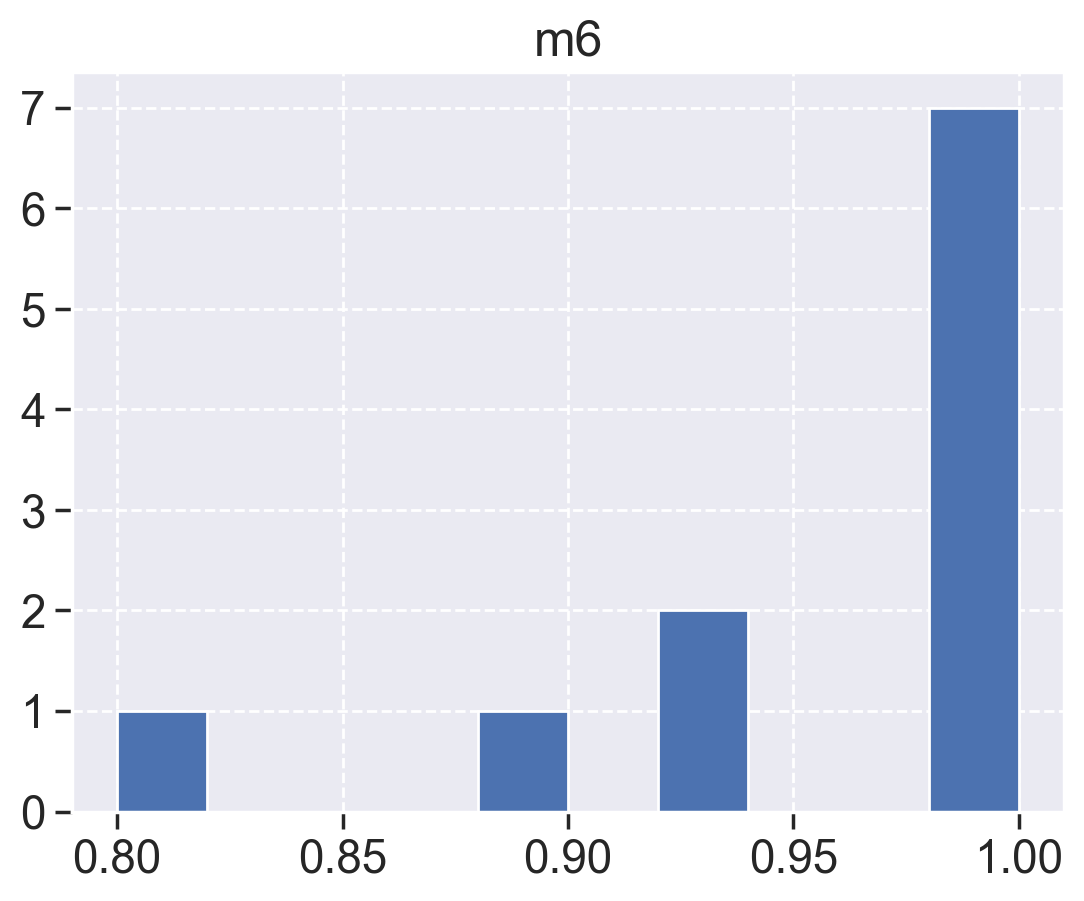

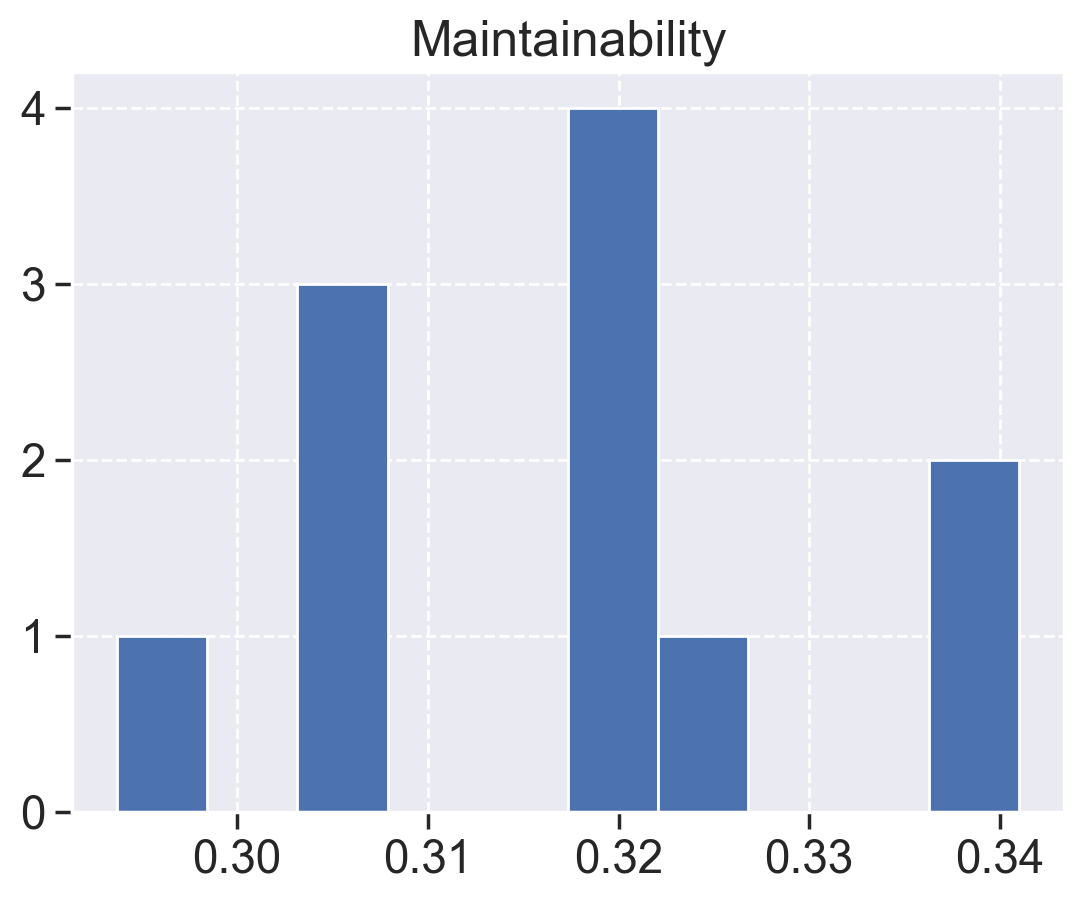

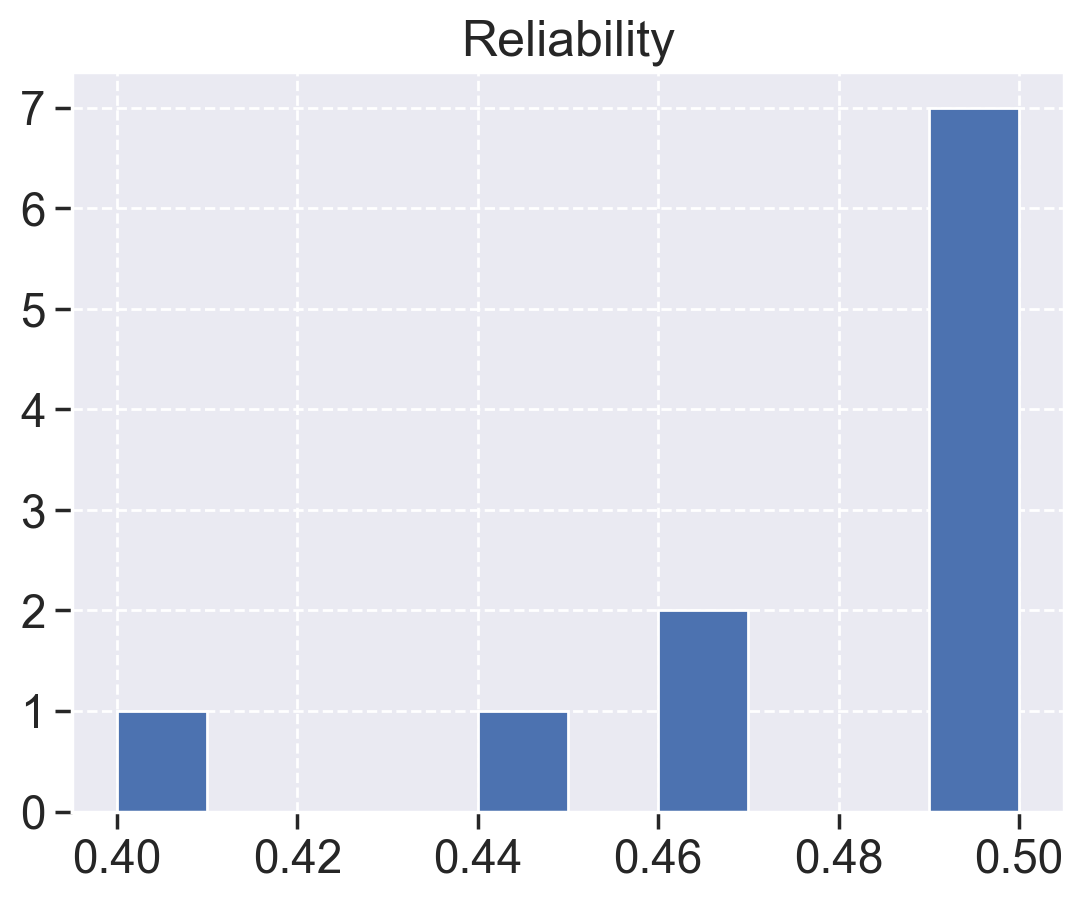

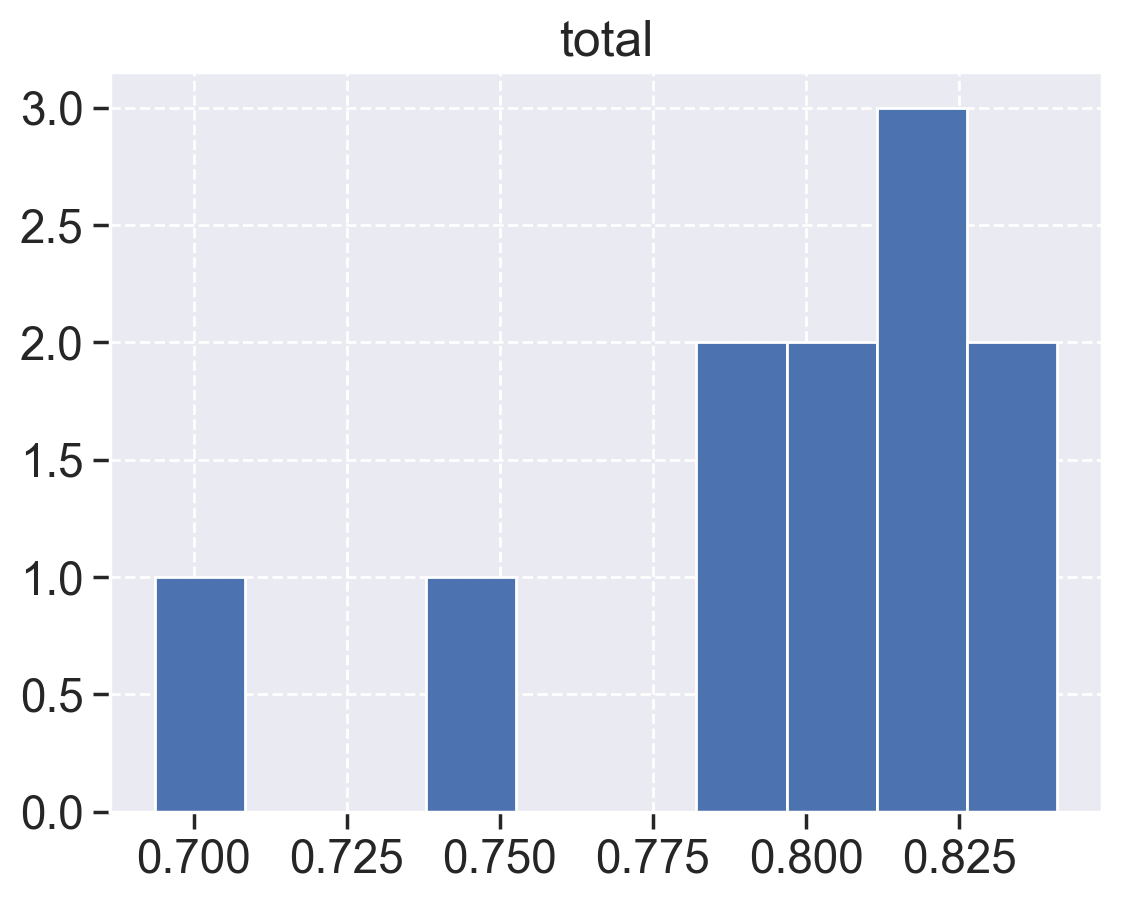

In [139]:

fig = plt.figure(figsize=(5, 3))


metrics_df.hist(column='m1')
metrics_df.hist(column='m2')
metrics_df.hist(column='m3')
metrics_df.hist(column='m4')
metrics_df.hist(column='m5')
metrics_df.hist(column='m6')
metrics_df.hist(column='Maintainability')
metrics_df.hist(column='Reliability')
metrics_df.hist(column='total')
plt.show()


In [130]:
### Outputting quality measures and indicator to csv, and xlsx files

In [131]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
# import os
# currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
#   
# metrics_df.to_excel(f'./data/fga-eps-mds-2022-1-schedula-{currentDateTime}.xlsx', index = False)
# 
# metrics_df.to_csv(f'./data/fga-eps-mds-2022-1-schedula-{currentDateTime}.csv', index = False)
